In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import re
import time
import warnings
warnings.filterwarnings("ignore") 

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import scipy.stats as stats
import random


from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statistics

In [2]:
heart_data=pd.read_csv('heart.csv')
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
# Percentage of patients have and do not have breast cancer
heart_data['target'].value_counts()/heart_data.shape[0]*100 

1    51.317073
0    48.682927
Name: target, dtype: float64

## Analyzing Data

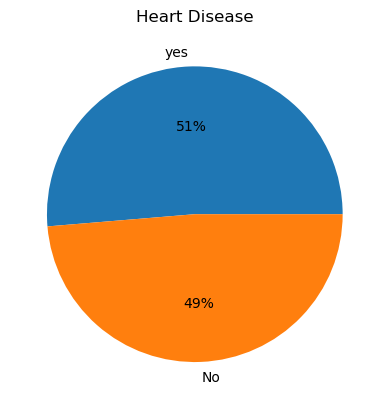

In [6]:
# plot to display the percentage of the people having and not having breast cancer 
labels = ['yes', 'No']
values = heart_data['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

<Axes: xlabel='target', ylabel='count'>

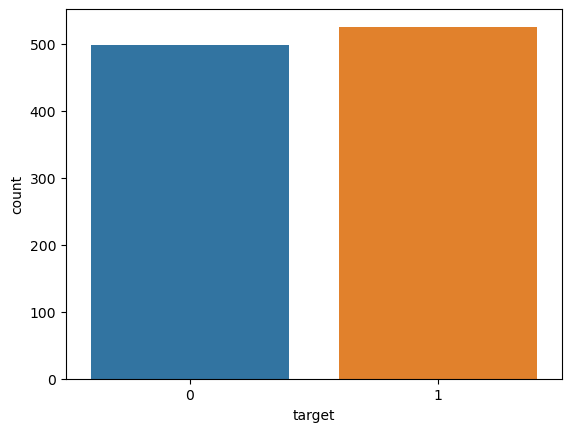

In [7]:
sns.countplot(x='target',data=heart_data)

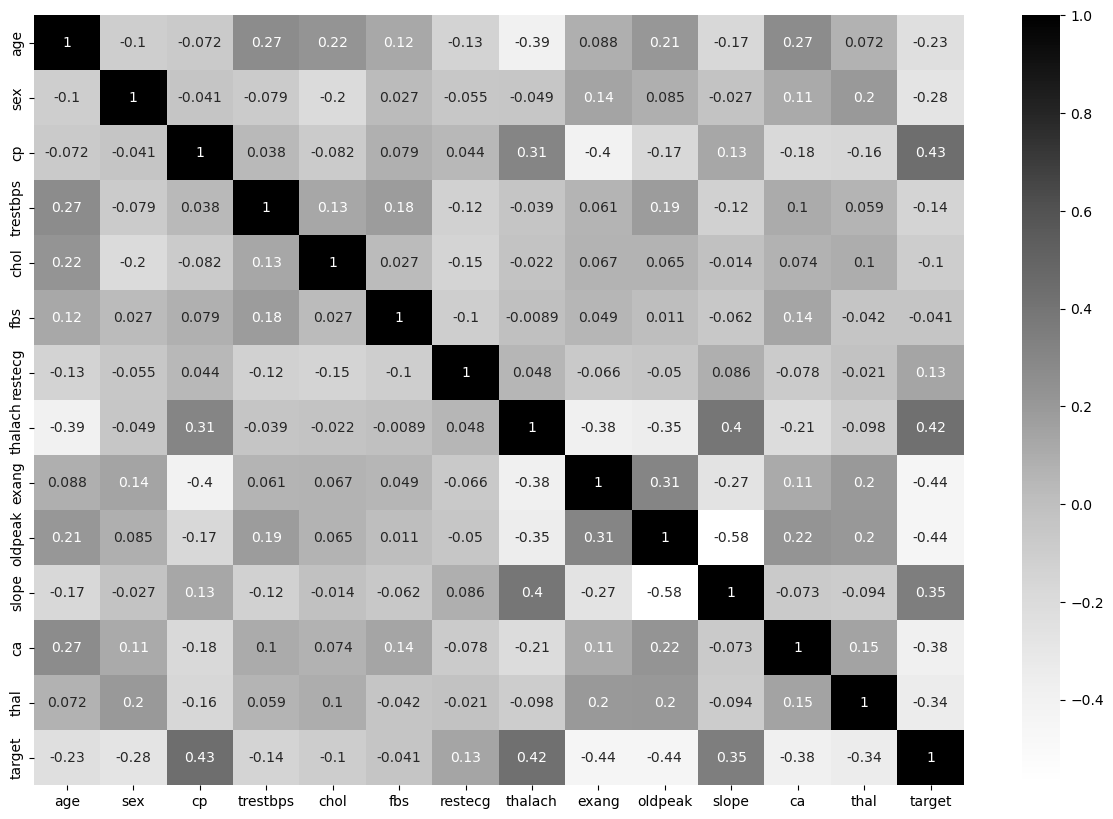

In [8]:
# Correlation map
plt.figure(figsize=(15, 10))
sns.heatmap(heart_data.corr(), annot = True, cmap = "Greys")
plt.show()

## Data Wrangling

In [9]:
heart_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data preprocessing

In [11]:
X=heart_data.drop('target',axis=1)
y=heart_data["target"]
y_label = heart_data['target'].values.reshape(X.shape[0], 1)
headers = X.columns

X = preprocessing.minmax_scale(X, feature_range=(0.001, 1))
X= pd.DataFrame(X)
X.columns = headers

## Training Data & Evaluating ML Models

## SVC

Accuracy: 88.14569006419603
Precision: 89.36382377839685
Recall: 87.84009559659907
f1_score: 88.53084516938988
AUC: 0.8823993678373567
Standard deviation of accuracy:  0.01602010620601675
Standard deviation of precision:  0.032185436015605175
Standard deviation of recall:  0.02666969188668706
Standard deviation of f1_score:  0.016600177737947475
Standard deviation of AUC:  0.01613238329817903


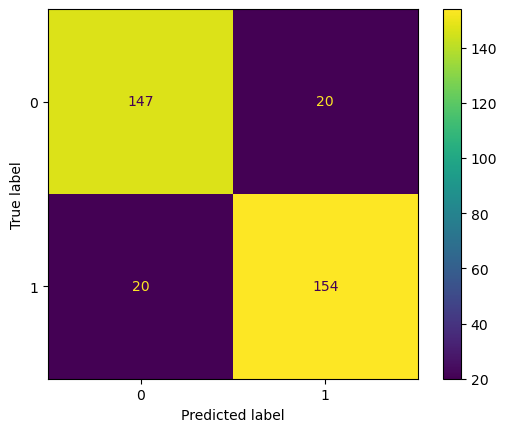

In [12]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy1 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sv = SVC()
    y_pred = fit_eval_model(sv, X_train, y_train, X_test, y_test)

    accuracy1.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy1)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy1))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## RandomForest Classifier

Accuracy: 98.4485774553686
Precision: 98.15459929692032
Recall: 98.85540686884727
f1_score: 98.49306850451948
AUC: 0.9845744674094825
Standard deviation of accuracy:  0.012726460917519498
Standard deviation of precision:  0.019076892425969976
Standard deviation of recall:  0.012273602402235906
Standard deviation of f1_score:  0.012354677768686874
Standard deviation of AUC:  0.012622500952468186


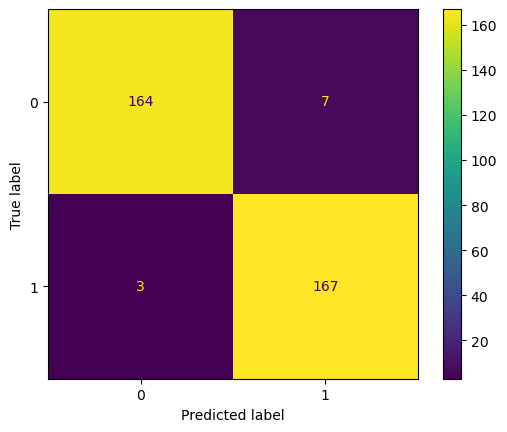

In [13]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy2 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier()
    y_pred = fit_eval_model(rf, X_train, y_train, X_test, y_test)

    accuracy2.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy2)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy2))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Ada Boost Classifier

Accuracy: 88.82858008494681
Precision: 89.5392267915912
Recall: 88.80863544674902
f1_score: 89.14645978129691
AUC: 0.8885024513656604
Standard deviation of accuracy:  0.018118962240607023
Standard deviation of precision:  0.022062206791338648
Standard deviation of recall:  0.025789679117870022
Standard deviation of f1_score:  0.018391409026400105
Standard deviation of AUC:  0.01806322499326443


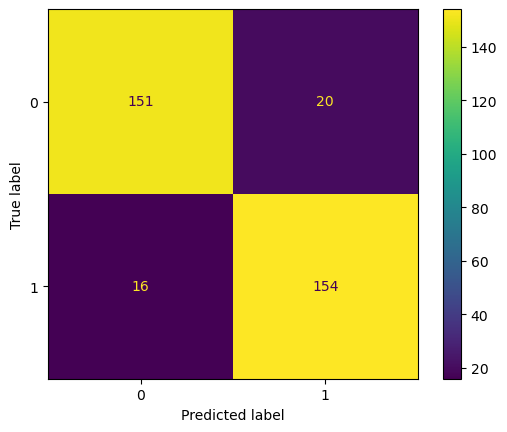

In [14]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy3 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ab = AdaBoostClassifier()
    y_pred = fit_eval_model(ab, X_train, y_train, X_test, y_test)

    accuracy3.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy3)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy3))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Gradient boosting Classifier

Accuracy: 95.80430793503798
Precision: 96.01818498755183
Recall: 95.87260655648575
f1_score: 95.91806785922012
AUC: 0.9584471835763371
Standard deviation of accuracy:  0.012255838244886345
Standard deviation of precision:  0.020841160812143725
Standard deviation of recall:  0.01940294102278804
Standard deviation of f1_score:  0.011735973887430353
Standard deviation of AUC:  0.012178577756825636


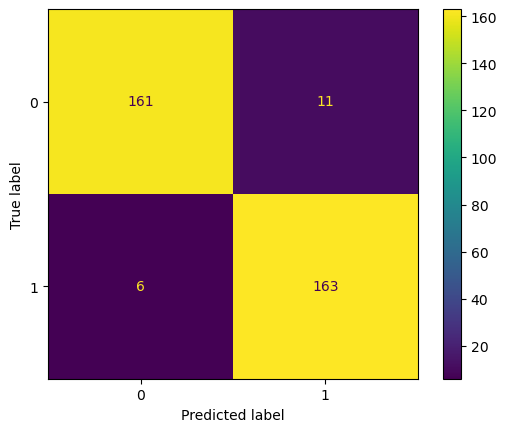

In [15]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy4 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb = GradientBoostingClassifier(random_state = 1)
    y_pred = fit_eval_model(gb, X_train, y_train, X_test, y_test)

    accuracy4.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy4)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy4))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Logistic Regression

Accuracy: 83.88254360240778
Precision: 89.14119931472278
Recall: 81.37968203344451
f1_score: 85.01506307561343
AUC: 0.8433735331119097
Standard deviation of accuracy:  0.018773383400310213
Standard deviation of precision:  0.022714131608226898
Standard deviation of recall:  0.03434417838305632
Standard deviation of f1_score:  0.017067636994634094
Standard deviation of AUC:  0.01674516890650858


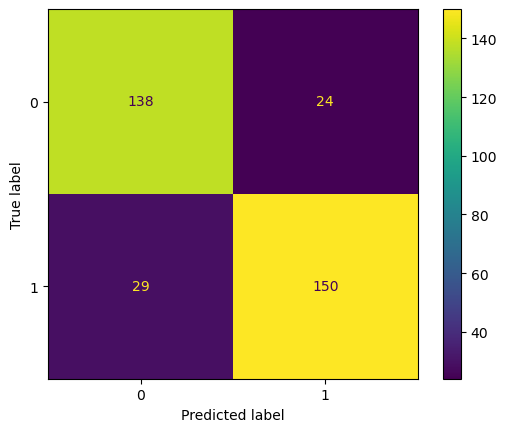

In [16]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy5 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lg = LogisticRegression(random_state = 1,solver='lbfgs', max_iter=1000)
    y_pred = fit_eval_model(lg, X_train, y_train, X_test, y_test)

    accuracy5.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy5)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy5))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

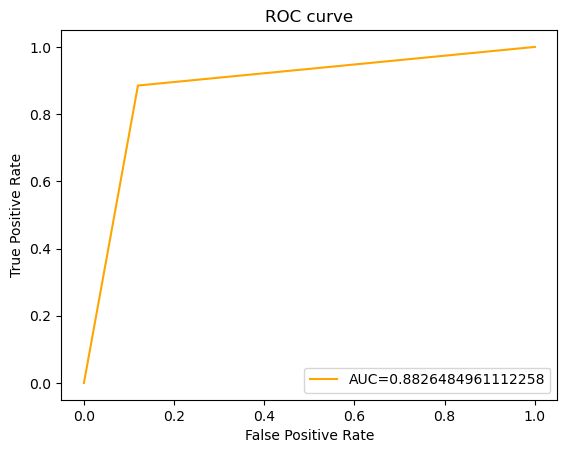

In [17]:
y_pred_proba = sv.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

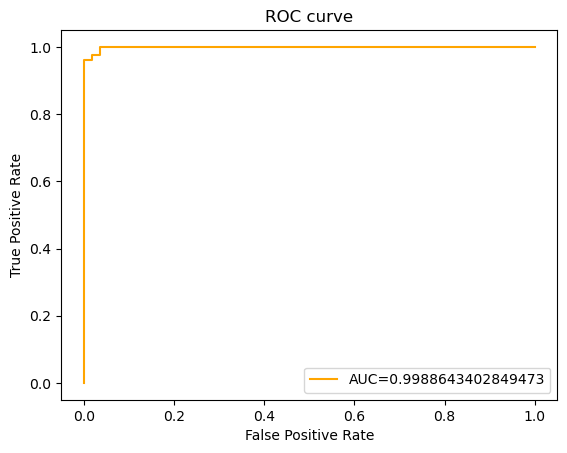

In [18]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

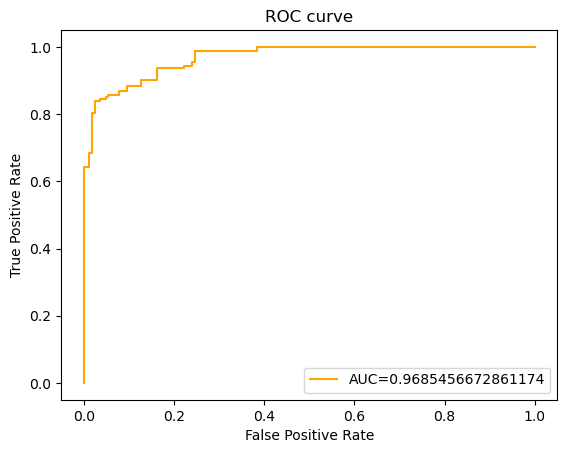

In [19]:
y_pred_proba = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

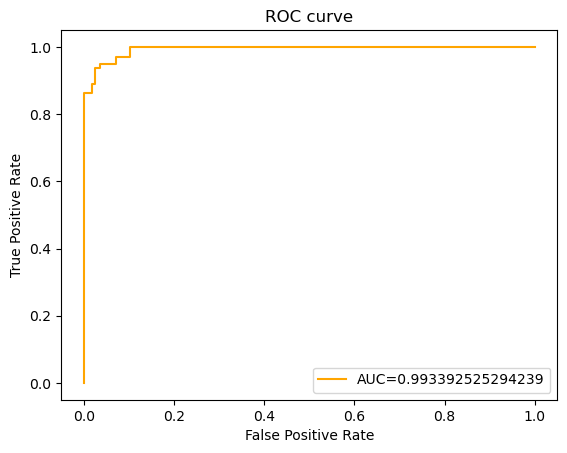

In [20]:
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

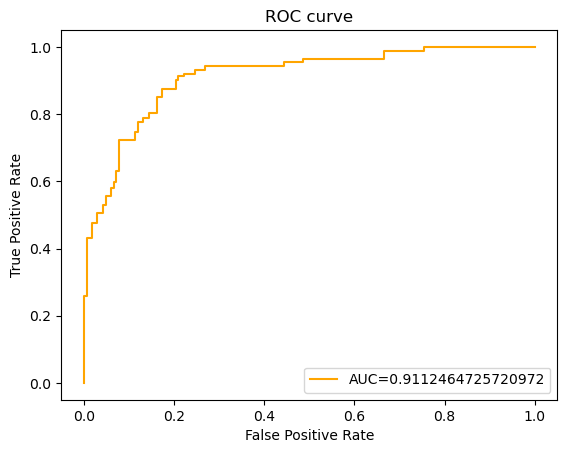

In [21]:
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hypertuning ML Models

## Gradient Boosting Classifier

Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.9951219512195122
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 100.0
AUC score: 1.0
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.9963414634146341
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 100.0
AUC score: 1.0
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'squared_error', 'learning_rate': 0.01, 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy

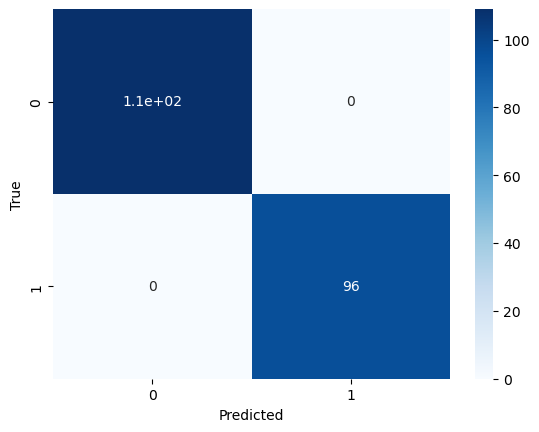

In [22]:
#-------------------------------------------------GridSearchCV-----------------------------------------------------#
best_params_list1=[]
ac_list1=[]
start = time.time()
    
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_1 = GridSearchCV(gb, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    gs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_1.best_params_)
    best_params_list1.append(gs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_1.best_score_)
    gs_1.best_estimator_.fit(X_train, y_train)
    y_pred = gs_1.best_estimator_.predict(X_test)    # Predictions
    y_true = y_test                                  # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list1.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 99.56585365853658
Precision: 99.48002826345443
Recall: 99.68335985267291
f1_score: 99.57402197927583
AUC: 0.9957336787411651
Standard deviation of accuracy:  0.008460257790360342
Standard deviation of precision:  0.013155211572861907
Standard deviation of recall:  0.010472478490005044
Standard deviation of f1_score:  0.008353541120608064
Standard deviation of AUC:  0.008284516054513268


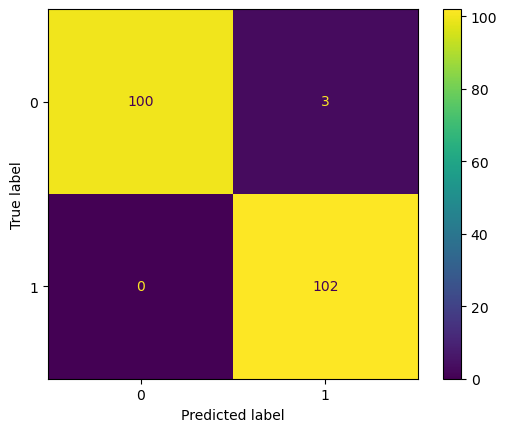

In [23]:
accuracy6=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list1[ac_list1.index(max(ac_list1))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb1 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb1.fit(X_train, y_train)
    y_pred = gb1.predict(X_test)
    
 
    accuracy6.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy6)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy6))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

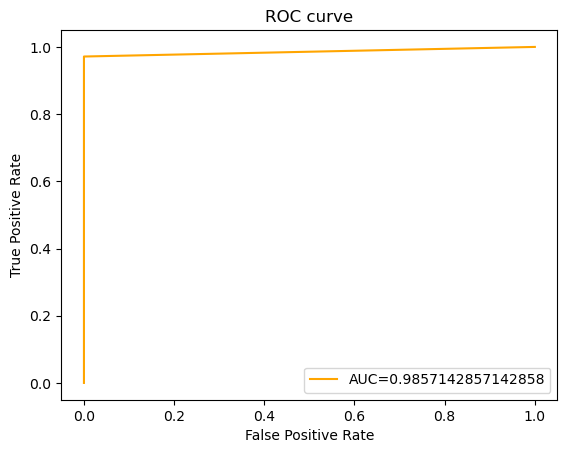

In [24]:
y_pred_proba = gb1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10, 'learning_rate': 1, 'criterion': 'squared_error'}

Mean cross-validated training accuracy score: 0.9939024390243902
Test accuracy: 97.07317073170731
Precision: 94.05940594059405
Recall: 100.0
F1 score: 96.93877551020408
AUC score: 0.9727272727272727
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10, 'learning_rate': 0.01, 'criterion': 'squared_error'}

Mean cross-validated training accuracy score: 0.9926829268292682
Test accuracy: 98.53658536585365
Precision: 97.0
Recall: 100.0
F1 score: 98.47715736040608
AUC score: 0.986111111111111
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10

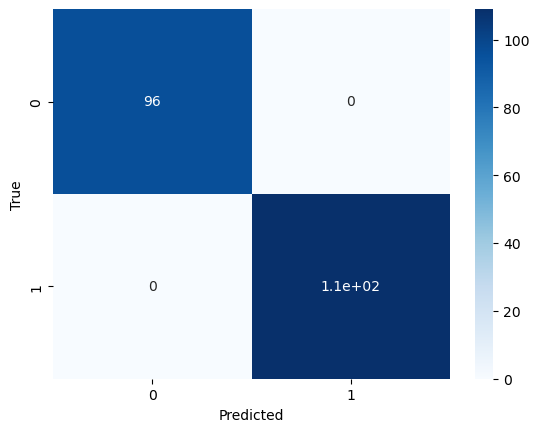

In [25]:
#-------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list2=[]
ac_list2=[]
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_1 = RandomizedSearchCV(gb, param_distributions=hyperparameter_space,n_iter=10, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_1.best_params_)
    best_params_list2.append(rs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_1.best_score_)
    rs_1.best_estimator_.fit(X_train, y_train)
    y_pred = rs_1.best_estimator_.predict(X_test) # Predictions
    y_true = y_test # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list2.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-----------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 99.65853658536585
Precision: 99.59622203651536
Recall: 99.7530655979377
f1_score: 99.66904332035622
AUC: 0.9966414969642295
Standard deviation of accuracy:  0.0070876405586027275
Standard deviation of precision:  0.010094518062984259
Standard deviation of recall:  0.009866585009076537
Standard deviation of f1_score:  0.006828965202560584
Standard deviation of AUC:  0.006883485194986089


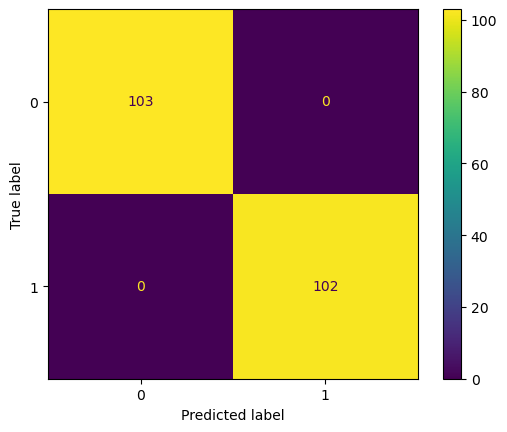

In [26]:
accuracy7=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list2[ac_list2.index(max(ac_list2))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    gb2 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb2.fit(X_train, y_train)
    y_pred = gb2.predict(X_test)
    accuracy7.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy7)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy7))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

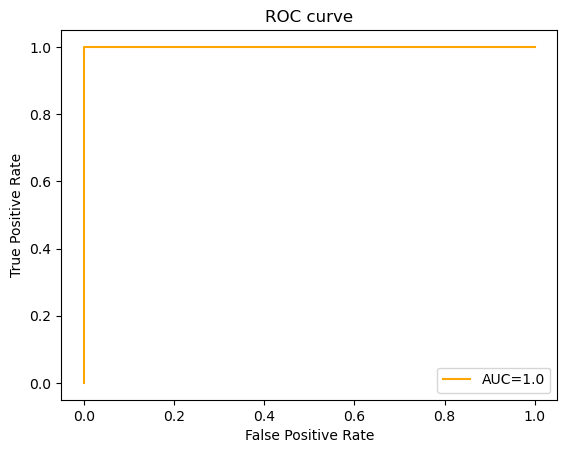

In [27]:
y_pred_proba = gb2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
#--------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]
row, col=X.shape

start = time.time()
params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'learning_rate':(0.01, 1),
    'n_estimators':(50, 150)
}

# Gradient Boosting Machine
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    
    model = gb
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f


training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
        
gbm_bo_1 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_1.maximize(init_points=10,n_iter=4)
        
        
print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_1.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)
        
end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9707    | 0.3808    | 9.556     | 7.588     | 109.9     |
| 2         | 0.9707    | 0.1645    | 2.404     | 1.523     | 136.6     |
| 3         | 0.9707    | 0.6051    | 7.373     | 1.185     | 147.0     |
| 4         | 0.9707    | 0.8341    | 2.911     | 2.636     | 68.34     |
| 5         | 0.9707    | 0.3112    | 5.723     | 4.888     | 79.12     |
| 6         | 0.9707    | 0.6157    | 2.255     | 3.629     | 86.64     |
| 7         | 0.9707    | 0.4615    | 8.067     | 2.797     | 101.4     |
| 8         | 0.9707    | 0.5965    | 1.418     | 6.468     | 67.05     |
| 9         | 0.9707    | 0.0744    | 9.54      | 9.691     | 130.8     |
| 10        | 0.9707    | 0.3116    | 1.879     | 7.158     | 94.02     |
| 11        | 0.9707    | 0.5991    | 9.988     | 9.5       | 50.27     |
| 12        | 0.9707    | 0.4232    | 

Accuracy: 99.50243902439026
Precision: 99.51625795983446
Recall: 99.51022942551027
f1_score: 99.50684835411072
AUC: 0.9951161724599423
Standard deviation of accuracy:  0.00919761435477654
Standard deviation of precision:  0.013001458912082377
Standard deviation of recall:  0.011413053310280837
Standard deviation of f1_score:  0.009396007309198675
Standard deviation of AUC:  0.009029086956102546


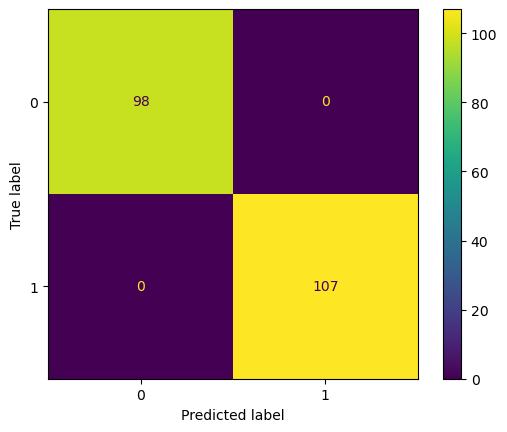

In [29]:
accuracy8=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb3 = GradientBoostingClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth, learning_rate=learning_rate)
    gb3.fit(X_train, y_train)
    y_pred = gb3.predict(X_test)
    
    accuracy8.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy8)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy8))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

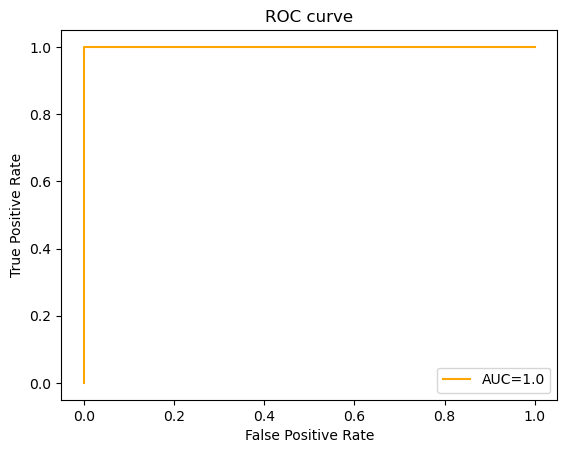

In [30]:
y_pred_proba = gb3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.9939024390243901
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 100.0
AUC score: 1.0
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.9939024390243901
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 100.0
AUC score: 1.0
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.9939024390243902
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score:

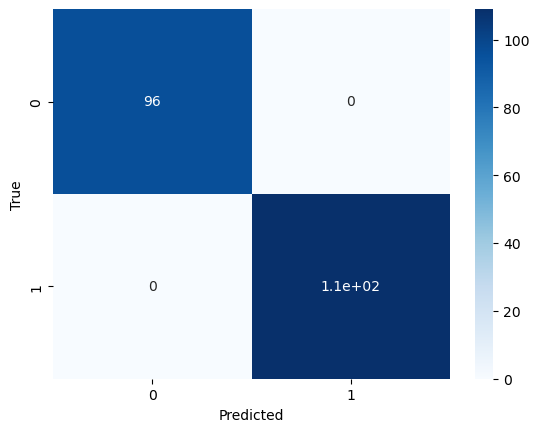

In [31]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list4=[]
ac_list4=[]   
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_2 = GridSearchCV(rf, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_2.best_params_)
    best_params_list4.append(gs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_2.best_score_)
    gs_2.best_estimator_.fit(X_train, y_train)
    y_pred = gs_2.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list4.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('----------------------------------------------------------------------------------------------------------------')
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 99.55121951219512
Precision: 99.65428921619217
Recall: 99.46241477204504
f1_score: 99.55132816588899
AUC: 0.9955751596077275
Standard deviation of accuracy:  0.007228003502729395
Standard deviation of precision:  0.009415036366595839
Standard deviation of recall:  0.012217741267531878
Standard deviation of f1_score:  0.007196285958217808
Standard deviation of AUC:  0.007089626170733479


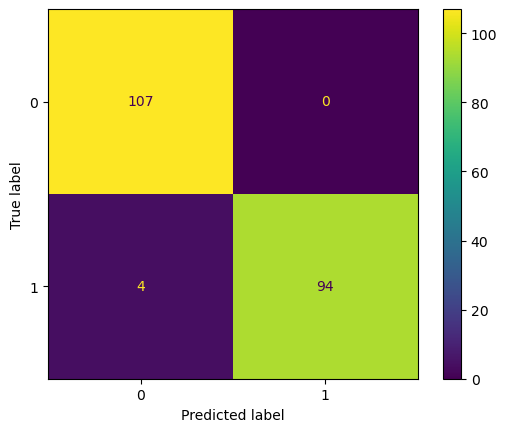

In [32]:
accuracy9=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list4[ac_list4.index(max(ac_list4))]
criterion=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rf1 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf1.fit(X_train, y_train)
    y_pred = rf1.predict(X_test)
    
    accuracy9.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy9)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy9))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

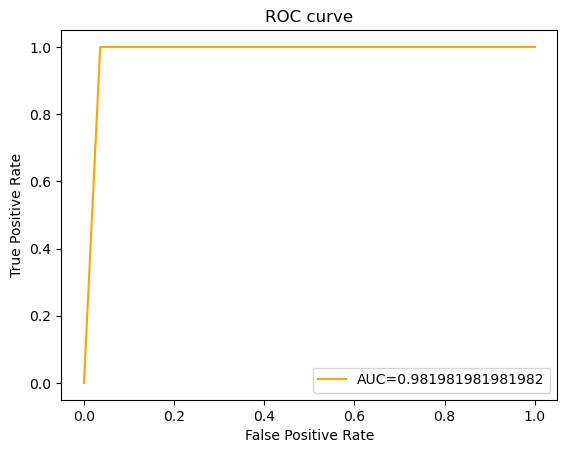

In [33]:
y_pred_proba = rf1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.9902439024390244
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 100.0
AUC score: 1.0
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 1.0
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 100.0
AUC score: 1.0
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.9902439024390244
Test accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 score: 10

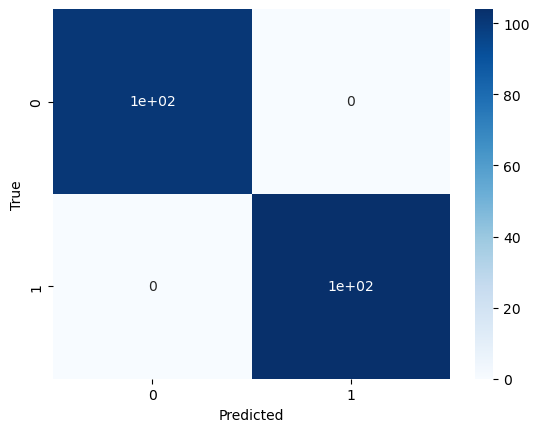

In [34]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list5=[]
ac_list5=[]
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_2 = RandomizedSearchCV(rf, param_distributions=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_2.best_params_)
    best_params_list5.append(rs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_2.best_score_)
    rs_2.best_estimator_.fit(X_train, y_train)
    y_pred = rs_2.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list5.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 99.46829268292683
Precision: 99.54416171184738
Recall: 99.43067976181334
f1_score: 99.48052519994282
AUC: 0.9948011931912677
Standard deviation of accuracy:  0.009278660193853407
Standard deviation of precision:  0.012181876744410156
Standard deviation of recall:  0.012075800093780042
Standard deviation of f1_score:  0.009003011639989816
Standard deviation of AUC:  0.009140375744426043


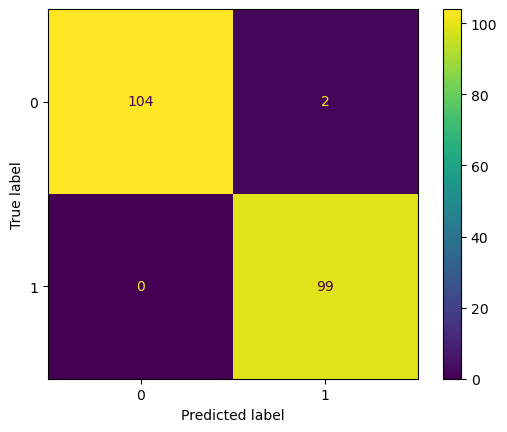

In [35]:
accuracy10=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list5[ac_list5.index(max(ac_list5))]
creation=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf2 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf2.fit(X_train, y_train)
    y_pred = rf2.predict(X_test)
    
    accuracy10.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy10)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy10))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

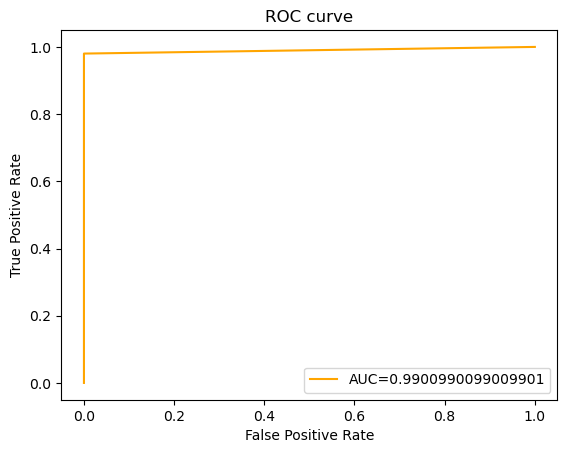

In [36]:
y_pred_proba = rf2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [37]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'n_estimators':(50, 150)
}

start = time.time()

def gbm_cl_bo(max_depth, max_features, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = rf
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f
   
training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
    
# Run Bayesian Optimization

gbm_bo_2 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_2.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_2.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
| 1         | 1.0       | 4.371     | 9.556     | 123.2     |
| 2         | 1.0       | 6.388     | 2.404     | 65.6      |
| 3         | 1.0       | 1.523     | 8.796     | 110.1     |
| 4         | 1.0       | 7.373     | 1.185     | 147.0     |
| 5         | 1.0       | 8.492     | 2.911     | 68.18     |
| 6         | 1.0       | 2.651     | 3.738     | 102.5     |
| 7         | 1.0       | 4.888     | 3.621     | 111.2     |
| 8         | 1.0       | 2.255     | 3.629     | 86.64     |
| 9         | 1.0       | 5.105     | 8.067     | 69.97     |
| 10        | 1.0       | 5.628     | 6.332     | 54.65     |
| 11        | 1.0       | 9.903     | 8.867     | 149.8     |
| 12        | 1.0       | 1.967     | 9.971     | 150.0     |
| 13        | 1.0       | 9.687     | 9.986     | 50.17     |
| 14        | 1.0       | 9.251     | 1.667     | 149.9     |
Accuracy

Accuracy: 88.22926829268293
Precision: 94.0648395068381
Recall: 84.70841035107055
f1_score: 89.08958758807648
AUC: 0.8880559984609228
Standard deviation of accuracy:  0.02250571193064742
Standard deviation of precision:  0.02814686989305429
Standard deviation of recall:  0.031455623288543885
Standard deviation of f1_score:  0.02131582568179434
Standard deviation of AUC:  0.022159132417004603


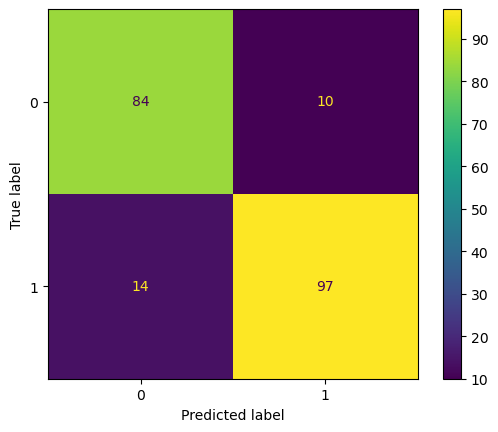

In [38]:
accuracy11=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
n_estimators=par['n_estimators']
max_features=par['max_features']
max_depth=par['max_depth']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf3 = RandomForestClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth )
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)

    accuracy11.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy11)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy11))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

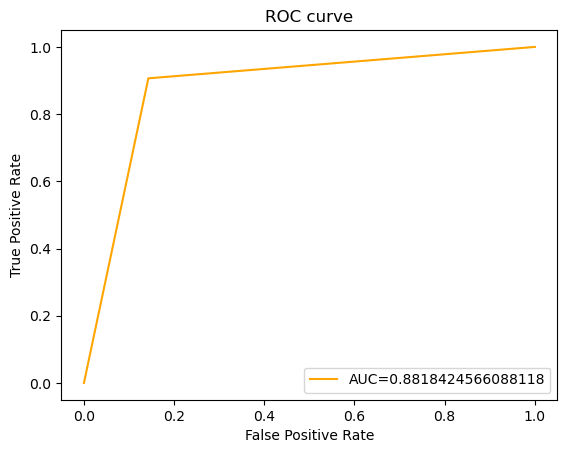

In [39]:
y_pred_proba = rf3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVC

Optimal hyperparameter combination: {'C': 10, 'degree': 5}

Mean cross-validated training accuracy score: 0.9414634146341463
Test accuracy: 95.60975609756098
Precision: 98.88888888888889
Recall: 91.75257731958763
F1 score: 95.18716577540107
AUC score: 0.9541332569683083
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'degree': 5}

Mean cross-validated training accuracy score: 0.9390243902439025
Test accuracy: 94.6341463414634
Precision: 94.78260869565217
Recall: 95.6140350877193
F1 score: 95.19650655021834
AUC score: 0.9451031424715636
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'degree': 5}

Mean cross-validated training accuracy score: 0.9463414634146341
Test accuracy: 94.14634146341463
Precision: 92.0
Recall: 95.83333333333334
F1 score: 93.87755102040816
AU

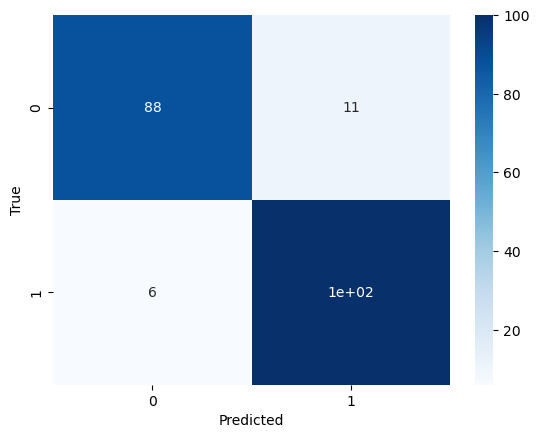

In [40]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list7=[]
ac_list7=[]
    
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_3 = GridSearchCV(sv, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_3.best_params_)
    best_params_list7.append(gs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_3.best_score_)
    gs_3.best_estimator_.fit(X_train, y_train)
    y_pred = gs_3.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list7.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 95.30243902439025
Precision: 94.84366874880521
Recall: 96.00629575320455
f1_score: 95.39391288151911
AUC: 0.9529746063079142
Standard deviation of accuracy:  0.014404955712710122
Standard deviation of precision:  0.02289157903422567
Standard deviation of recall:  0.019708161183016437
Standard deviation of f1_score:  0.014009271429549315
Standard deviation of AUC:  0.014544792168871954


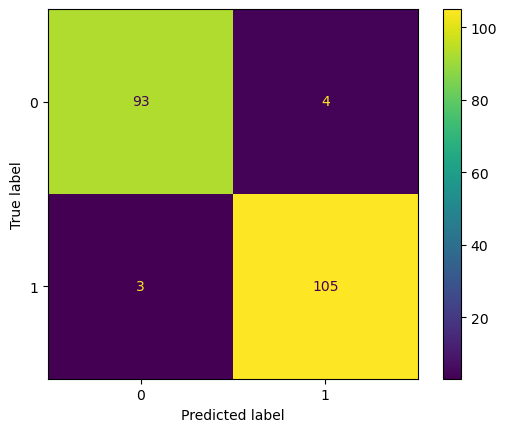

In [41]:
accuracy12=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list7[ac_list7.index(max(ac_list7))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv1 = SVC(C=C, degree=degree )
    sv1.fit(X_train, y_train)
    y_pred = sv1.predict(X_test)
    
    accuracy12.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy12)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy12))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

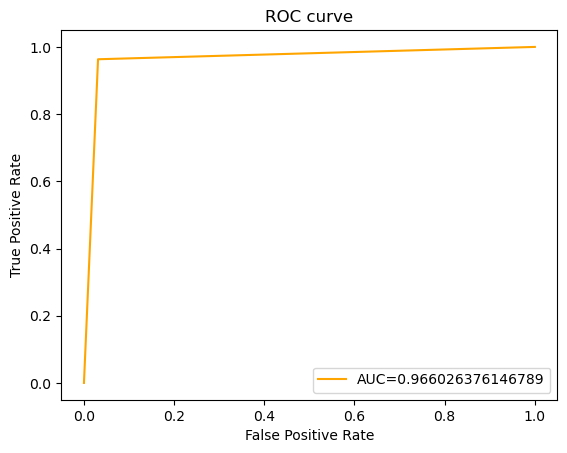

In [42]:
y_pred_proba = sv1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'degree': 5, 'C': 10}

Mean cross-validated training accuracy score: 0.9536585365853657
Test accuracy: 94.14634146341463
Precision: 97.11538461538461
Recall: 91.81818181818183
F1 score: 94.39252336448598
AUC score: 0.9433014354066985
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 10}

Mean cross-validated training accuracy score: 0.9524390243902439
Test accuracy: 95.60975609756098
Precision: 96.0
Recall: 95.04950495049505
F1 score: 95.52238805970148
AUC score: 0.956016755521706
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 10}

Mean cross-validated training accuracy score: 0.9475609756097562
Test accuracy: 95.1219512195122
Precision: 98.11320754716981
Recall: 92.85714285714286
F1 score: 95.4128440366972

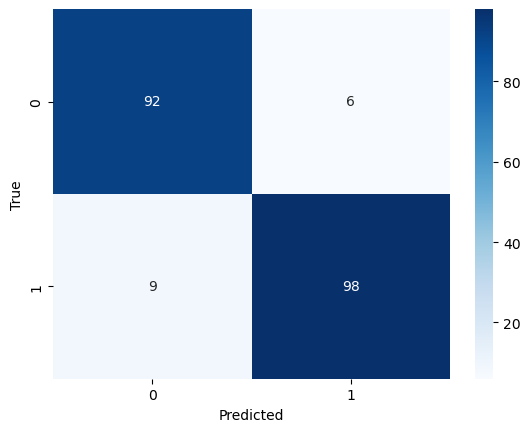

In [43]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list8=[]
ac_list8=[]
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_3 = RandomizedSearchCV(sv, param_distributions=hyperparameter_space,scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_3.best_params_)
    best_params_list8.append(rs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_3.best_score_)
    rs_3.best_estimator_.fit(X_train, y_train)
    y_pred = rs_3.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list8.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 94.81951219512196
Precision: 94.26082694752903
Recall: 95.67910627123864
f1_score: 94.93279111812453
AUC: 0.947989330239588
Standard deviation of accuracy:  0.014523354941899934
Standard deviation of precision:  0.022896689841986055
Standard deviation of recall:  0.02244614959519879
Standard deviation of f1_score:  0.01455836335970565
Standard deviation of AUC:  0.014773704744548472


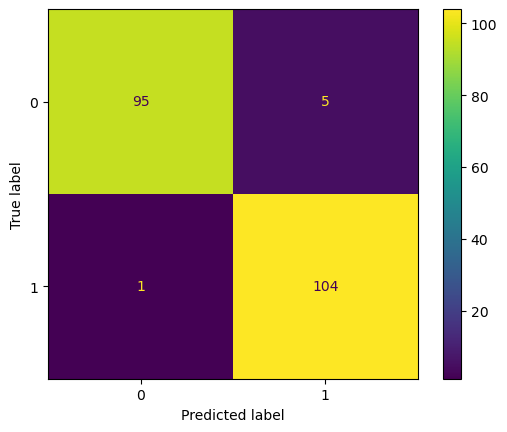

In [44]:
accuracy13=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list8[ac_list8.index(max(ac_list8))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv2 = SVC(C=C, degree=degree )
    sv2.fit(X_train, y_train)
    y_pred = sv2.predict(X_test)

    accuracy13.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy13)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy13))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

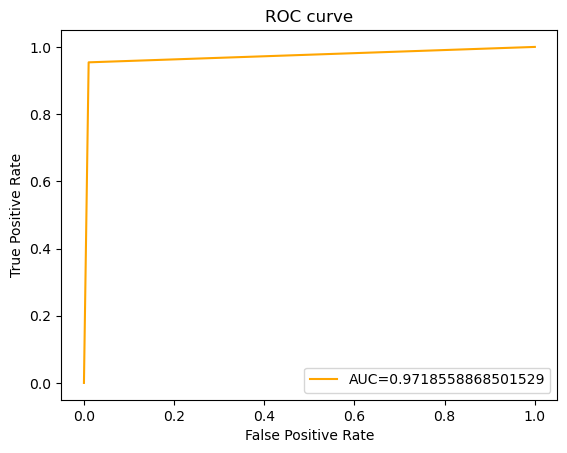

In [45]:
y_pred_proba = sv2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [46]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]


params_gbm ={
    'C':(3,10), 
    'degree':(5,20)
}

start = time.time()

def gbm_cl_bo(C, degree):
    params_gbm = {}
    params_gbm['C'] = round(C)
    params_gbm['degree'] = degree
   
    model = sv
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_3 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_3.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_3.max['params']
params_gbm['C'] = round(params_gbm['C'])
params_gbm['degree'] = round(params_gbm['degree'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     |  degree   |
-------------------------------------------------
| 1         | 0.8732    | 5.622     | 19.26     |
| 2         | 0.8732    | 8.124     | 13.98     |
| 3         | 0.8732    | 4.092     | 7.34      |
| 4         | 0.8732    | 3.407     | 17.99     |
| 5         | 0.8732    | 7.208     | 15.62     |
| 6         | 0.8732    | 3.144     | 19.55     |
| 7         | 0.8732    | 8.827     | 8.185     |
| 8         | 0.8732    | 4.273     | 7.751     |
| 9         | 0.8732    | 5.13      | 12.87     |
| 10        | 0.8732    | 6.024     | 9.368     |
| 11        | 0.8732    | 7.711     | 12.96     |
| 12        | 0.8732    | 9.989     | 5.006     |
| 13        | 0.8732    | 9.74      | 20.0      |
| 14        | 0.8732    | 9.966     | 5.04      |
Accuracy: 87.3170731707317
Precision: 89.13043478260869
F1-Score: 86.31578947368422
Recall: 83.6734693877551
AUC: 0.8716383749761587
Best hyperparameters:
{'C': 6, 'degree': 19}
Execution time of Baye

Accuracy: 94.11219512195122
Precision: 93.91632612062796
Recall: 94.52211067482502
f1_score: 94.1706436532625
AUC: 0.9413828115123954
Standard deviation of accuracy:  0.017829042652261973
Standard deviation of precision:  0.02818250724951461
Standard deviation of recall:  0.02757924200257251
Standard deviation of f1_score:  0.018362323232487182
Standard deviation of AUC:  0.017707580582390844


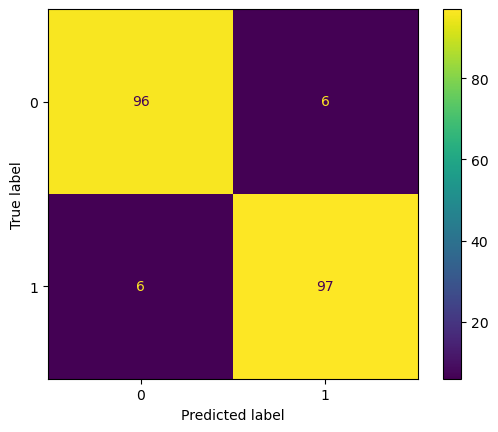

In [47]:
accuracy14=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    sv3 = SVC(C=C, degree=degree )
    sv3.fit(X_train, y_train)
    y_pred = sv3.predict(X_test)

    accuracy14.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy14)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy14))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

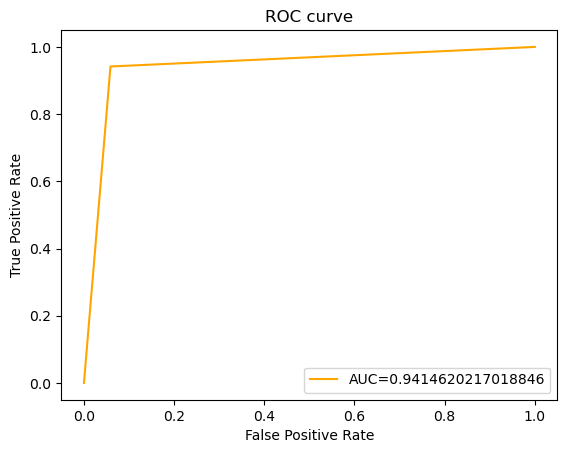

In [48]:
y_pred_proba = sv3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Ada Boost Classifier

Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.85
Test accuracy: 84.8780487804878
Precision: 84.68468468468468
Recall: 87.03703703703704
F1 score: 85.84474885844749
AUC score: 0.8475563192058037
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.8463414634146341
Test accuracy: 82.92682926829268
Precision: 87.25490196078431
Recall: 80.18018018018019
F1 score: 83.56807511737088
AUC score: 0.8317519647306881
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.8597560975609756
Test accuracy: 80.97560975609757
Precision: 77.659

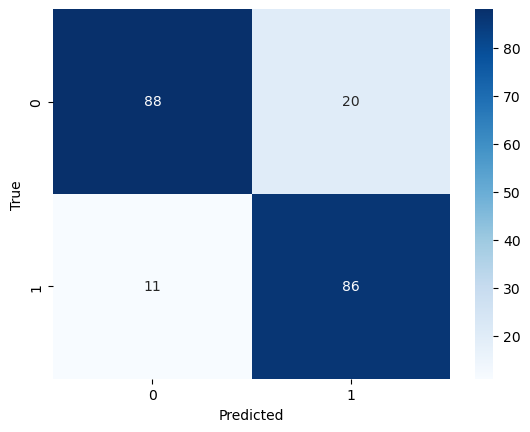

In [49]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list10=[]
ac_list10=[]
   
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_4 = GridSearchCV(ab, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_4.best_params_)
    best_params_list10.append(gs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_4.best_score_)
    gs_4.best_estimator_.fit(X_train, y_train)
    y_pred = gs_4.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list10.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 84.81951219512196
Precision: 87.58583188204776
Recall: 83.31128285439132
f1_score: 85.33831037800228
AUC: 0.8495733505104427
Standard deviation of accuracy:  0.02535448036573576
Standard deviation of precision:  0.03774230433627832
Standard deviation of recall:  0.03048282208309164
Standard deviation of f1_score:  0.02593235002895857
Standard deviation of AUC:  0.025935032811066412


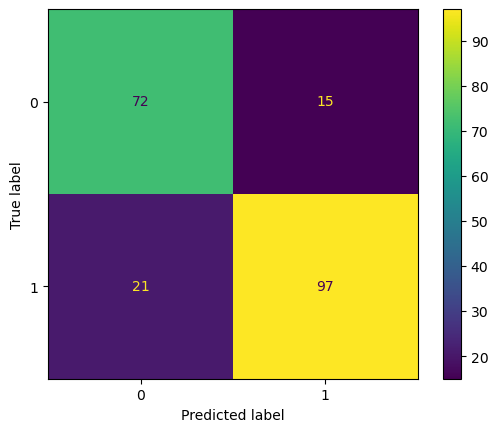

In [50]:
accuracy15=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list10[ac_list10.index(max(ac_list10))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab1 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab1.fit(X_train, y_train)
    y_pred = ab1.predict(X_test)
    
    accuracy15.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy15)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy15))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

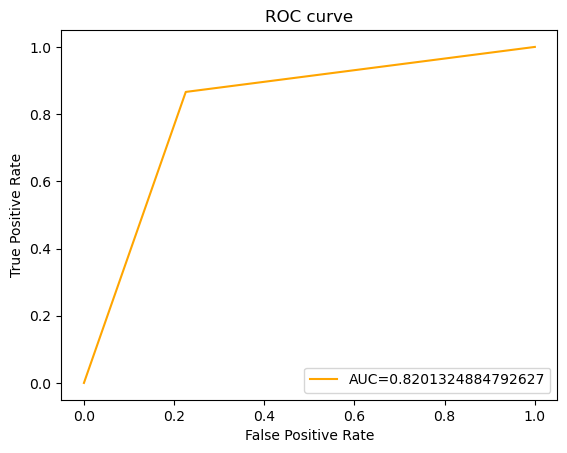

In [51]:
y_pred_proba = ab1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.8585365853658538
Test accuracy: 81.95121951219512
Precision: 75.67567567567568
Recall: 89.36170212765957
F1 score: 81.95121951219512
AUC score: 0.8251868890166763
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.852439024390244
Test accuracy: 82.4390243902439
Precision: 78.57142857142857
Recall: 83.69565217391305
F1 score: 81.05263157894737
AUC score: 0.8255579068872643
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.8536585365853657
Test accuracy: 84.39024390243902
Precisio

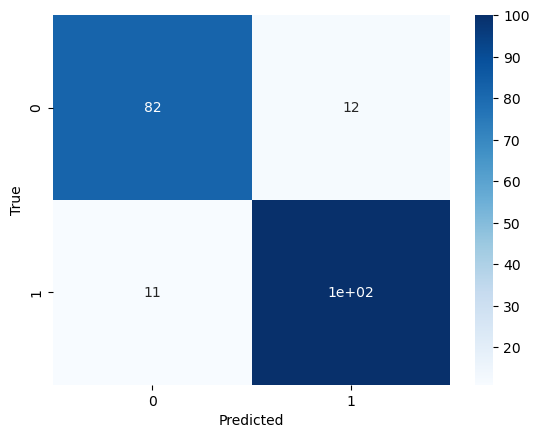

In [52]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list11=[]
ac_list11=[]
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_4 = RandomizedSearchCV(ab, param_distributions=hyperparameter_space,
                            scoring="accuracy",
                            n_jobs=-1, cv=10, return_train_score=True)

    rs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_4.best_params_)
    best_params_list11.append(rs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_4.best_score_)
    rs_4.best_estimator_.fit(X_train, y_train)
    y_pred = rs_4.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list11.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 84.74634146341465
Precision: 87.57491825439003
Recall: 83.38271548146662
f1_score: 85.3572834600021
AUC: 0.8488339108911314
Standard deviation of accuracy:  0.019864459992695784
Standard deviation of precision:  0.03115260415630774
Standard deviation of recall:  0.034003454397595334
Standard deviation of f1_score:  0.02154978364727561
Standard deviation of AUC:  0.02003906945260771


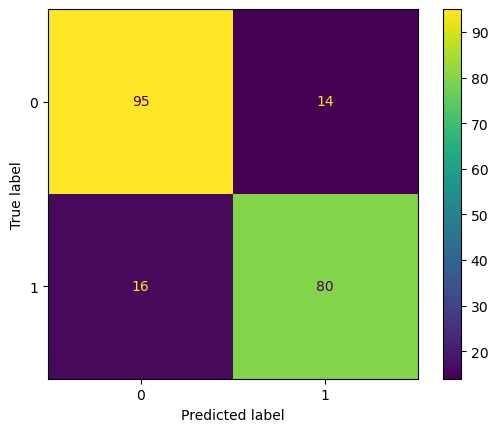

In [53]:
accuracy16=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list11[ac_list11.index(max(ac_list11))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab2 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab2.fit(X_train, y_train)
    y_pred = ab2.predict(X_test)
    accuracy16.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy16)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy16))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

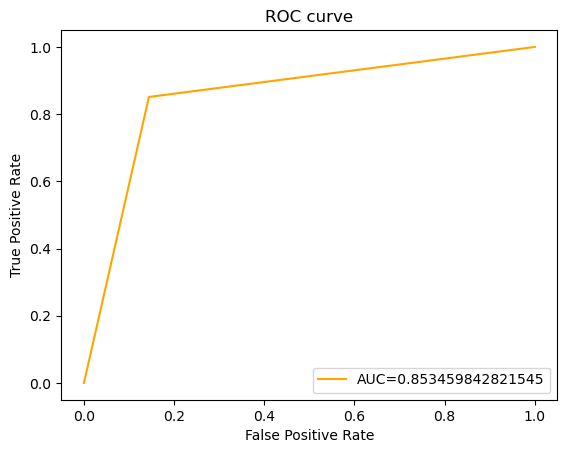

In [54]:
y_pred_proba = ab2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()

params_gbm ={
    'n_estimators':(3,10)
}

def gbm_cl_bo(n_estimators):
    params_gbm = {}
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = ab
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_4 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_4.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_4.max['params']
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.8927    | 5.622     |
| 2         | 0.8927    | 9.655     |
| 3         | 0.8927    | 8.124     |
| 4         | 0.8927    | 7.191     |
| 5         | 0.8927    | 4.092     |
| 6         | 0.8927    | 4.092     |
| 7         | 0.8927    | 3.407     |
| 8         | 0.8927    | 9.063     |
| 9         | 0.8927    | 7.208     |
| 10        | 0.8927    | 7.957     |
| 11        | 0.8927    | 6.522     |
| 12        | 0.8927    | 3.001     |
| 13        | 0.8927    | 9.999     |
| 14        | 0.8927    | 3.0       |
Accuracy: 89.26829268292683
Precision: 86.27450980392157
F1-Score: 88.8888888888889
Recall: 91.66666666666666
AUC: 0.8941131498470948
Best hyperparameters:
{'n_estimators': 6}
Execution time of Bayesian Optimization (in Seconds): 2.7444138526916504


Accuracy: 83.57560975609758
Precision: 84.71642978475205
Recall: 83.6934205651973
f1_score: 84.10874375645977
AUC: 0.836278149094469
Standard deviation of accuracy:  0.024346400604040943
Standard deviation of precision:  0.036698350508166534
Standard deviation of recall:  0.03913028718540647
Standard deviation of f1_score:  0.02576684412208027
Standard deviation of AUC:  0.024174131966324095


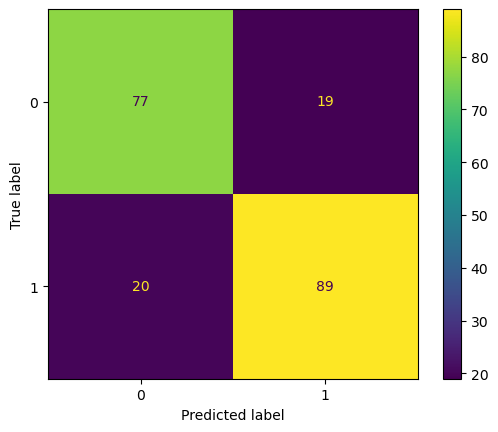

In [56]:
accuracy17=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab3 = AdaBoostClassifier( n_estimators= n_estimators )
    ab3.fit(X_train, y_train)
    y_pred = ab3.predict(X_test)

    accuracy17.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy17)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy17))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

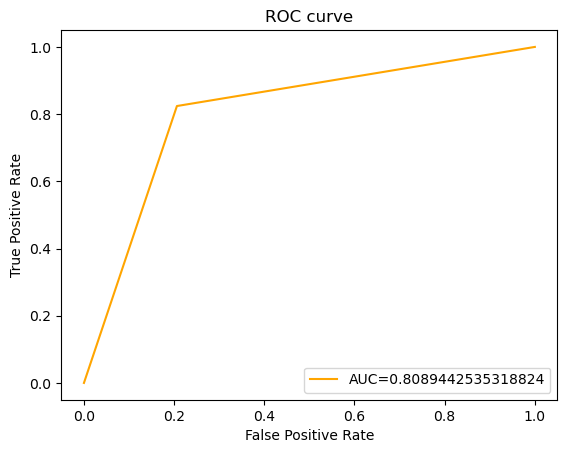

In [57]:
y_pred_proba = ab3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression

Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.8451219512195122
Test accuracy: 85.36585365853658
Precision: 84.375
Recall: 91.52542372881356
F1 score: 87.8048780487805
AUC score: 0.8426845899084356
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.8365853658536585
Test accuracy: 87.8048780487805
Precision: 85.08771929824562
Recall: 92.38095238095238
F1 score: 88.58447488584474
AUC score: 0.876904761904762
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.8329268292682928
Test accuracy: 85.3658536

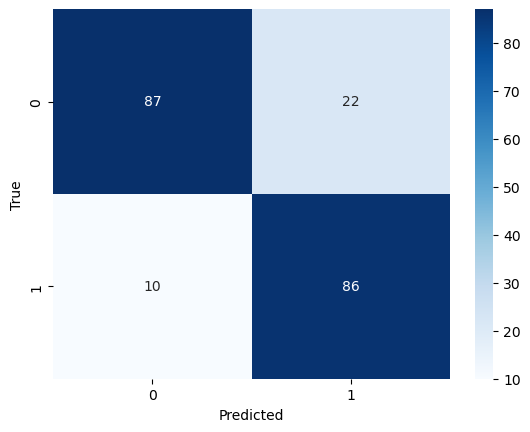

In [58]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list13=[]
ac_list13=[]   
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_5 = GridSearchCV(lg, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_5.best_params_)
    best_params_list13.append(gs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_5.best_score_)
    gs_5.best_estimator_.fit(X_train, y_train)
    y_pred = gs_5.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list13.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 84.55609756097563
Precision: 89.853412957634
Recall: 82.09120955133389
f1_score: 85.69649465794829
AUC: 0.8500910305942206
Standard deviation of accuracy:  0.02536338987788306
Standard deviation of precision:  0.03121592679350539
Standard deviation of recall:  0.04351603227662196
Standard deviation of f1_score:  0.0253284877177123
Standard deviation of AUC:  0.02377145914320388


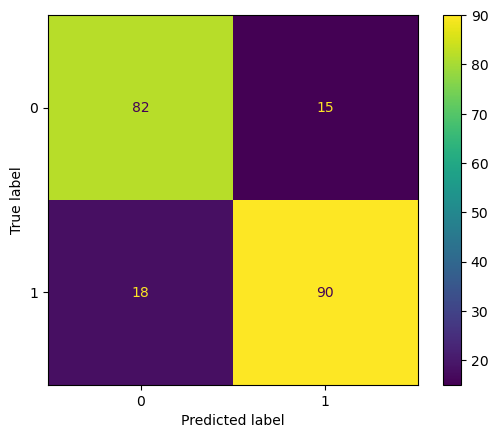

In [59]:
accuracy18=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list13[ac_list13.index(max(ac_list13))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr1 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr1.fit(X_train, y_train)
    y_pred = lr1.predict(X_test)
    
    accuracy18.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy18)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy18))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

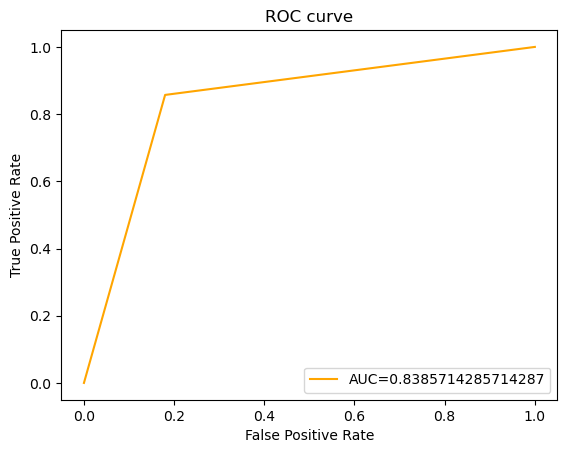

In [60]:
y_pred_proba = lr1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.8487804878048781
Test accuracy: 83.90243902439025
Precision: 76.69902912621359
Recall: 89.77272727272727
F1 score: 82.72251308900525
AUC score: 0.8462995337995338
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.8243902439024391
Test accuracy: 88.78048780487805
Precision: 86.48648648648648
Recall: 92.3076923076923
F1 score: 89.30232558139535
AUC score: 0.8872810357958872
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.8451219512195122
Test accur

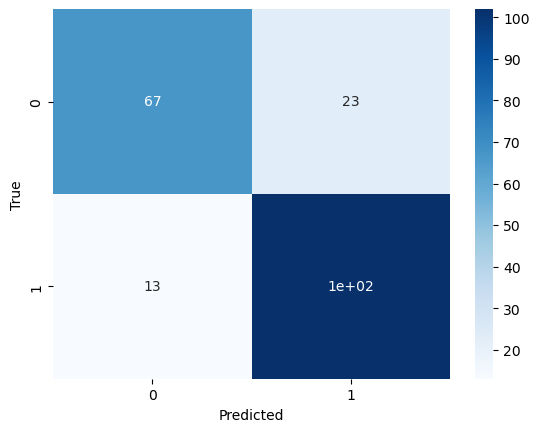

In [61]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list14=[]
ac_list14=[]
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rs_5 = RandomizedSearchCV(lg, param_distributions=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_5.best_params_)
    best_params_list14.append(rs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_5.best_score_)
    rs_5.best_estimator_.fit(X_train, y_train)
    y_pred = rs_5.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list14.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 84.05853658536587
Precision: 89.61140469227577
Recall: 81.27461721268783
f1_score: 85.15783350723618
AUC: 0.8453752390420387
Standard deviation of accuracy:  0.02229351796827713
Standard deviation of precision:  0.030287205796965203
Standard deviation of recall:  0.037755827955689505
Standard deviation of f1_score:  0.022892319127951085
Standard deviation of AUC:  0.021117535652751273


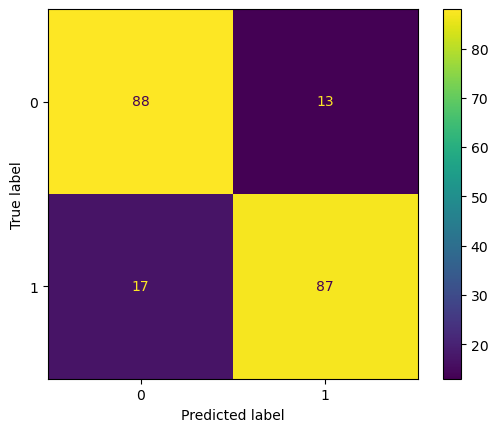

In [62]:
accuracy19=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list14[ac_list14.index(max(ac_list14))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr2 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr2.fit(X_train, y_train)
    y_pred = lr2.predict(X_test)
    
    accuracy19.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy19)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy19))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

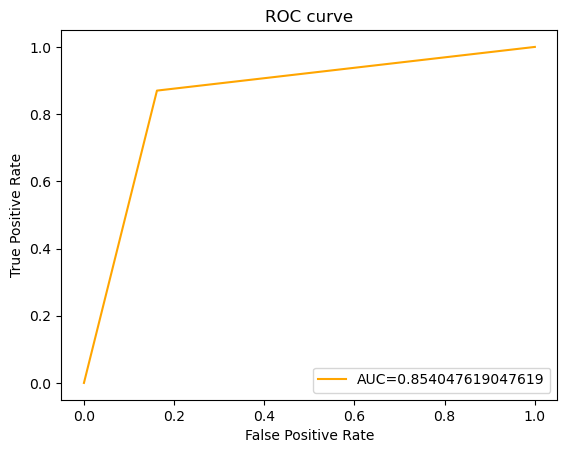

In [63]:
y_pred_proba = lr2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()
params_gbm ={
    'max_iter':(500,1000), 
    'C':(0.1, 10),
    'intercept_scaling':(1.0,3.0)
}

# LogisticRegression Machine
def gbm_cl_bo(max_iter, C, intercept_scaling):
    params_gbm = {}
    params_gbm['max_iter'] = round(max_iter)
    params_gbm['C'] = C
    params_gbm['intercept_scaling'] = intercept_scaling
    
    model = lg
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)*100))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_5 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_5.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_5.max['params']
params_gbm['max_iter'] = round(params_gbm['max_iter'])
params_gbm['C'] = round(params_gbm['C'])
params_gbm['intercept_scaling'] = round(params_gbm['intercept_scaling'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     | interc... | max_iter  |
-------------------------------------------------------------
| 1         | 0.8634    | 3.808     | 2.901     | 866.0     |
| 2         | 0.8634    | 6.027     | 1.312     | 578.0     |
| 3         | 0.8634    | 0.675     | 2.732     | 800.6     |
| 4         | 0.8634    | 7.11      | 1.041     | 985.0     |
| 5         | 0.8634    | 8.341     | 1.425     | 590.9     |
| 6         | 0.8634    | 1.916     | 1.608     | 762.4     |
| 7         | 0.8634    | 4.376     | 1.582     | 805.9     |
| 8         | 0.8634    | 1.481     | 1.584     | 683.2     |
| 9         | 0.8634    | 4.615     | 2.57      | 599.8     |
| 10        | 0.8634    | 5.191     | 2.185     | 523.2     |
| 11        | 0.8634    | 9.716     | 2.265     | 992.9     |
| 12        | 0.8634    | 0.1476    | 1.43      | 999.6     |
| 13        | 0.8634    | 9.632     | 2.222     | 500.3     |
| 14        | 0.8634    | 9.176     | 1.148     | 999.6     |
Accuracy

Accuracy: 83.70731707317074
Precision: 89.91186056369258
Recall: 80.70169522437338
f1_score: 84.99973455428315
AUC: 0.8431890968179798
Standard deviation of accuracy:  0.02391957794918152
Standard deviation of precision:  0.0268669957815686
Standard deviation of recall:  0.03510418125819341
Standard deviation of f1_score:  0.02153600926104232
Standard deviation of AUC:  0.022493601531864495


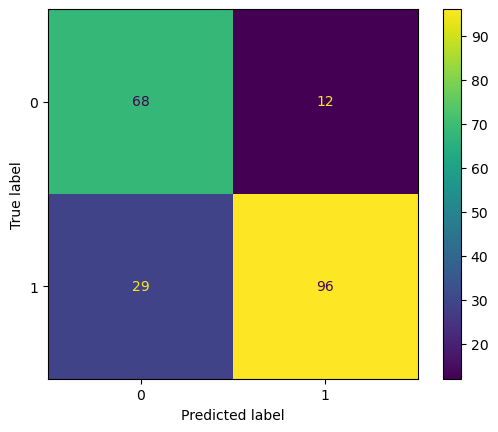

In [65]:
accuracy20=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr3 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr3.fit(X_train, y_train)
    y_pred = lr3.predict(X_test)
    
    accuracy20.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy20)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy20))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

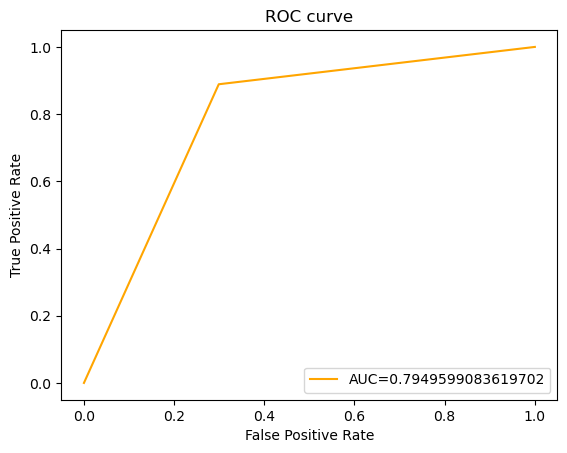

In [66]:
y_pred_proba = lr3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Neural Network Model

11/11 [==============================] - 0s 2ms/step
Accuracy: 77.5709271549679
Precision: 79.6845183437016
Recall: 77.9666441527461
f1_score: 78.32619681901326
AUC: 0.7831307402064369
Standard deviation of accuracy:  0.0328141824047982
Standard deviation of precision:  0.08747718746446871
Standard deviation of recall:  0.05374898584264066
Standard deviation of f1_score:  0.037319576729383575


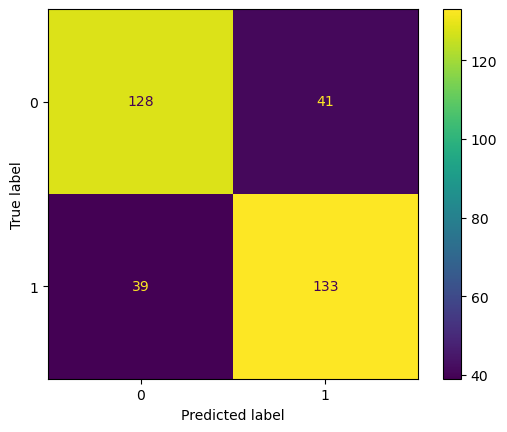

In [67]:
nnaccuracy=[]
nnprecision=[]
nnrecall=[]
nnf1score=[]
nnauc=[]

def NeuralNet():
    model = Sequential()
    model.add(Dense(8, input_shape=(13,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y_label):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_label[train_index], y_label[test_index]
    
    nn = KerasClassifier(build_fn=NeuralNet)   #create the NN model
    nn.fit(X_train, y_train)                   #train the model
    y_pred = nn.predict(X_test)                  # Predictions
    
    nnaccuracy.append(accuracy_score(y_pred, y_test))
    nnprecision.append(precision_score(y_pred, y_test))
    nnrecall.append(recall_score(y_pred, y_test))
    nnf1score.append(f1_score(y_pred, y_test))
    try:
        nnauc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval=['0','1']
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
    
print('Accuracy:', np.mean(nnaccuracy)*100)
print('Precision:', np.mean(nnprecision)*100)
print('Recall:', np.mean(nnrecall)*100)
print('f1_score:', np.mean(nnf1score)*100)
print('AUC:',np.mean(nnauc))

print('Standard deviation of accuracy: ', statistics.stdev(nnaccuracy))
print('Standard deviation of precision: ', statistics.stdev(nnprecision))
print('Standard deviation of recall: ', statistics.stdev(nnrecall))
print('Standard deviation of f1_score: ', statistics.stdev(nnf1score))

11/11 [==============================] - 0s 2ms/step


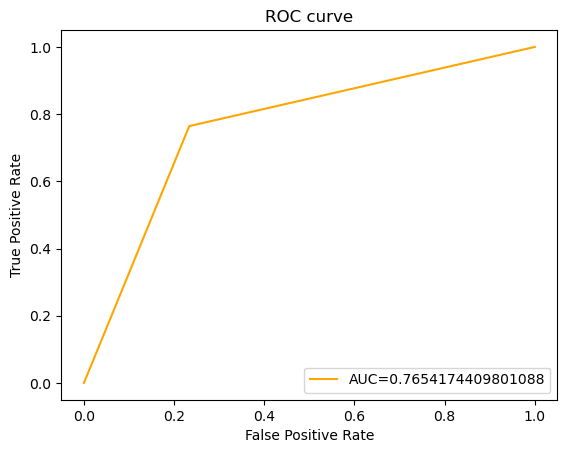

In [68]:
y_pred_proba = nn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameter Tuning of neural network model

In [69]:
LeakyReLU = LeakyReLU(alpha=0.1)
pd.set_option("display.max_columns", None)
score_acc = make_scorer(accuracy_score)

In [70]:
#-----------------------------------------------------Bayesian Optimization--------------------------------------------------#
row, col=X.shape
l=[]
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=13, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    nm = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    model1 = nm
    model1.fit(X_train, y_train)
    y_score = model1.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l[1].append(accuracy_score(y_test, y_score)*100)
    l[2].append(precision_score(y_test, y_score)*100)
    l[3].append(f1_score(y_test, y_score)*100)
    l[4].append(recall_score(y_test, y_score)*100)
    l[5].append(roc_auc_score(y_test, y_score)*100)
    l[0].append(f)
    return l[0][0]

params_nn2 ={
    'neurons': (1, 13),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.001, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=42)
nn_bo.maximize(init_points=10, n_iter=4)
start = time.time()

params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['dropout'] = round(params_nn_['dropout'])
params_nn_['dropout_rate'] = round(params_nn_['normalization'])
params_nn_['normalization'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]

print("Accuracy:", np.mean(l[1]))
print("Precision:", np.mean(l[2]))
print("F1-Score:" , np.mean(l[3]))
print("Recall:", np.mean(l[4])) 
print("AUC:", np.mean(l[5])) 
print('It takes %s minutes' % ((time.time() - start)/60))
print('-----------------------------------')
print('Best hyperparameters:')
params_nn_

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.8       | 3.371     | 960.6     | 0.732     | 0.1796    | 32.48     | 1.312     | 1.116     | 0.8663    | 8.213     | 0.7081    | 0.1441    |
| 2         | 0.8       | 8.729     | 866.0     | 0.2123    | 0.05455   | 34.67     | 1.608     | 2.05      | 0.4325    | 4.495     | 0.6119    | 0.9765    |
| 3         | 0.8       | 2.629     | 493.1     | 0.4561    | 0.2356    | 35.97     | 2.028     | 2.185     | 0.0474    | 8.291     | 0.1705    | 0.4554    |
| 4         | 0.8       | 8.54      | 972.5     | 0.8084    | 0.09138   | 27.81     | 2.368     | 1.88      | 0.1229    | 6.942     | 0.03439   | 6.365     |
| 5         | 0.8       | 2.329     | 730.0     | 0.

{'activation': 'softsign',
 'batch_size': 961,
 'dropout': 1,
 'dropout_rate': 1,
 'epochs': 32,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.8663099696291603,
 'neurons': 8,
 'normalization': 1,
 'optimizer': <keras.optimizers.optimizer_v2.adam.Adam at 0x1d62680d1c0>}

7/7 [==============================] - 0s 3ms/step
Accuracy: 79.64878048780487
Precision: 83.85748556988251
Recall: 78.95157900299462
f1_score: 80.95480467694033
AUC: 0.8032764535610722
Standard deviation of accuracy:  0.033518172283996374
Standard deviation of precision:  0.06718323811606385
Standard deviation of recall:  0.05972731828502887
Standard deviation of f1_score:  0.03341450493933551
Standard deviation of AUC:  0.030910358256870205


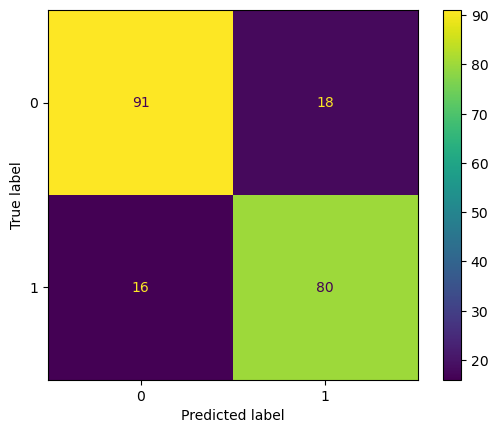

In [71]:
accuracy21=[]
precision=[]
recall=[]
f1score=[]
auc=[]

def NeuralNetbayesian():
    par=params_nn_
    activation=par['activation']
    batch_size=par['batch_size']
    dropout=par['dropout']
    dropout_rate=par['dropout_rate']
    epochs=par['epochs']
    layers1=par['layers1']
    layers2=par['layers2']
    learning_rate=par['learning_rate']
    neurons=par['neurons']
    normalization=par['normalization']
    optimizer=par['optimizer']

    model = Sequential()
    model.add(Dense(8, input_shape=(13,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kb = KerasClassifier(build_fn=NeuralNetbayesian)
    kb.fit(X_train, y_train)
    y_pred = kb.predict(X_test)
    
    accuracy21.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy21)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy21))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

7/7 [==============================] - 0s 5ms/step


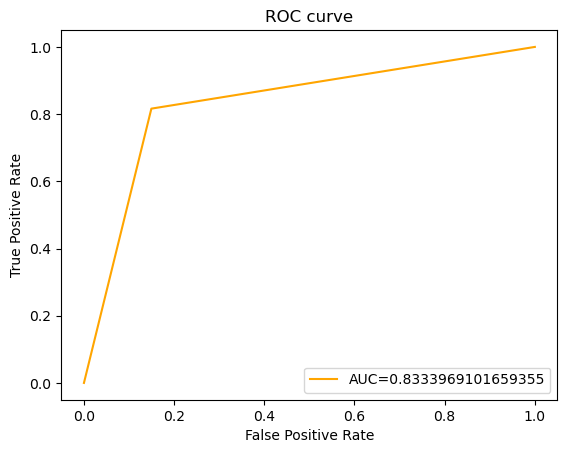

In [72]:
y_pred_proba = kb.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [73]:
#----------------------------------------------------------GridSearchCV-----------------------------------------------------#
# Function to create model
row,col=X.shape
best_params_list15=[]
ac_list15=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(8, input_shape=(13,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size=(200, 1000)
epochs=(20, 100)
learn_rate=(0.001, 1)
optimizer=(0,7)
activation=(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate=(0,0.3) 
neurons=(1, 13)

start = time.time()

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    best_params_list15.append(grid_result.best_params_)
    
    y_pred = grid.best_estimator_.predict(X_test)                                 # Predictions
    y_true = y_test                                                               # True values
    
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list15.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
print('It takes %s minutes' % ((time.time() - start)/60))
print()

Best: 0.831725 using {'batch_size': 200, 'epochs': 100, 'optimizer': 0, 'optimizer__activation': 9, 'optimizer__dropout_rate': 0, 'optimizer__learning_rate': 0.001, 'optimizer__neurons': 1, 'optimizer__weight_constraint': 1.0}
Test accuracy: 80.48780487804879
Precision: 81.45161290322581
Recall: 85.59322033898306
F1 score: 83.47107438016529
AUC score: 0.7957821936489383
------------------------------------------------------------------------------------------------------------------
Best: 0.836555 using {'batch_size': 200, 'epochs': 100, 'optimizer': 7, 'optimizer__activation': 9, 'optimizer__dropout_rate': 0.3, 'optimizer__learning_rate': 1, 'optimizer__neurons': 1, 'optimizer__weight_constraint': 1.0}
Test accuracy: 80.97560975609757
Precision: 75.24752475247524
Recall: 84.44444444444444
F1 score: 79.58115183246073
AUC score: 0.8135265700483092
------------------------------------------------------------------------------------------------------------------
Best: 0.834127 using {'bat

7/7 [==============================] - 0s 2ms/step
Accuracy: 78.7219512195122
Precision: 82.56311733511171
Recall: 78.13845357234024
f1_score: 79.90290525960943
AUC: 0.7936432380904178
Standard deviation of accuracy:  0.038992226212999144
Standard deviation of precision:  0.07878857367221817
Standard deviation of recall:  0.056844933305137485
Standard deviation of f1_score:  0.04461552552696233
Standard deviation of AUC:  0.03599603879533137


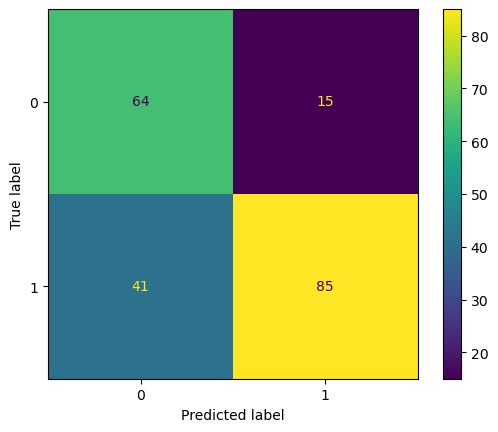

In [74]:
accuracy22=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetgrid():
    par=best_params_list15[ac_list15.index(max(ac_list15))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(8, input_shape=(13,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kg = KerasClassifier(build_fn=NeuralNetgrid)
    kg.fit(X_train, y_train)
    y_pred = kg.predict(X_test)
    
    accuracy22.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy22)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy22))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

7/7 [==============================] - 0s 2ms/step


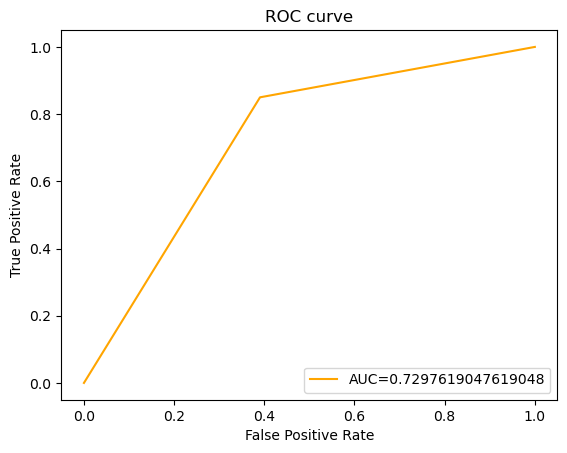

In [75]:
y_pred_proba = kg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [76]:
#-----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
# Function to create model
best_params_list16=[]
ac_list16=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(8, input_shape=(13,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the random search parameters
batch_size:(200, 1000)
epochs:(20, 100)
learn_rate:(0.001, 1)
optimizer:(0,7)
activation:(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate:(0,0.3) 
neurons: (1, 13)

start = time.time()
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    rndm = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
    rndm_result = rndm.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (rndm_result.best_score_, rndm_result.best_params_))
    means = rndm_result.cv_results_['mean_test_score']
    stds = rndm_result.cv_results_['std_test_score']
    params = rndm_result.cv_results_['params']
    best_params_list16.append(rndm_result.best_params_)
    
    y_pred = rndm.best_estimator_.predict(X_test)  # Predictions
    y_true = y_test                                # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list16.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

print('It takes %s minutes' % ((time.time() - start)/60))

Best: 0.793927 using {'optimizer__weight_constraint': 1.0, 'optimizer__neurons': 13, 'optimizer__learning_rate': 0.001, 'optimizer__dropout_rate': 0, 'optimizer__activation': 0, 'optimizer': 7, 'epochs': 100, 'batch_size': 200}
Test accuracy: 85.36585365853658
Precision: 86.48648648648648
Recall: 86.48648648648648
F1 score: 86.48648648648648
AUC score: 0.8526451983898793
------------------------------------------------------------------------------------------------------------------
Best: 0.825553 using {'optimizer__weight_constraint': 1.0, 'optimizer__neurons': 1, 'optimizer__learning_rate': 1, 'optimizer__dropout_rate': 0.3, 'optimizer__activation': 9, 'optimizer': 7, 'epochs': 100, 'batch_size': 200}
Test accuracy: 76.58536585365854
Precision: 72.22222222222221
Recall: 81.25
F1 score: 76.47058823529412
AUC score: 0.7686353211009174
------------------------------------------------------------------------------------------------------------------
Best: 0.807322 using {'optimizer__wei

7/7 [==============================] - 0s 3ms/step
Accuracy: 78.7560975609756
Precision: 84.71246962448876
Recall: 76.6913650024214
f1_score: 80.19788444753677
AUC: 0.7955514650966748
Standard deviation of accuracy:  0.040791330008340246
Standard deviation of precision:  0.06992422626265148
Standard deviation of recall:  0.055547496533964166
Standard deviation of f1_score:  0.04018027743049936
Standard deviation of AUC:  0.039337356844110404


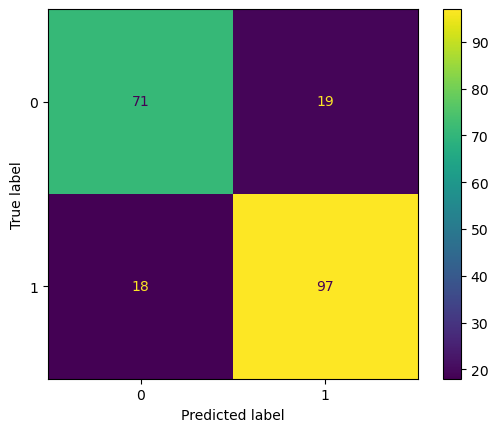

In [78]:
accuracy23=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetrandom():
    par=best_params_list16[ac_list16.index(max(ac_list16))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(8, input_shape=(13,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kr = KerasClassifier(build_fn=NeuralNetrandom)
    kr.fit(X_train, y_train)
    y_pred = kr.predict(X_test)
    
    accuracy23.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()  

print('Accuracy:', np.mean(accuracy23)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy23))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

7/7 [==============================] - 0s 2ms/step


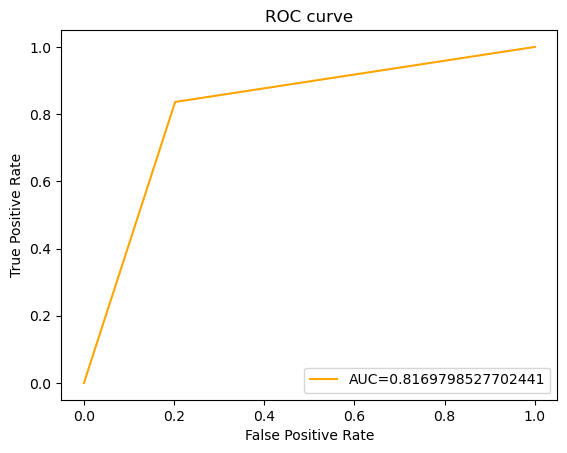

In [79]:
y_pred_proba = kr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## WILCOXON SIGNED RANK TEST

In [81]:
#-----------------------------------------------WILCOXON SIGNED RANK TEST------------------------------------------------------#
import random
ac_sv=[]
ac_rf=[]
ac_ab=[]
ac_gb=[]
ac_lg=[]
ac_nn=[]
row, col=X.shape

for i in range(5000):
    print(i)
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train_1=X.iloc[training_indices]
    X_test_1=X.iloc[test_indices]
    y_train_1=y[training_indices]
    y_test_1=y[test_indices]
    
    
    sv1.fit(X_train_1, y_train_1)
    pred1= sv1.predict(X_test_1)
    ac_sv.append(accuracy_score(y_test_1, pred1))
    
    rf1.fit(X_train_1, y_train_1)
    pred2= rf1.predict(X_test_1)
    ac_rf.append(accuracy_score(y_test_1, pred2))
    
    ab.fit(X_train_1, y_train_1)
    pred3= ab.predict(X_test_1)
    ac_ab.append(accuracy_score(y_test_1, pred3))
    
    gb2.fit(X_train_1, y_train_1)
    pred4= gb2.predict(X_test_1)
    ac_gb.append(accuracy_score(y_test_1, pred4))
    
    lr1.fit(X_train_1, y_train_1)
    pred5= lr1.predict(X_test_1)
    ac_lg.append(accuracy_score(y_test_1, pred5))
    
    kb.fit(X_train_1, y_train_1)
    pred6= kb.predict(X_test_1)
    ac_nn.append(accuracy_score(y_test_1, pred6))
    
alpha=0.05
stat,w1=stats.wilcoxon(ac_sv, ac_gb, zero_method='zsplit')
print(w1)
if(w1<alpha):
    print("reject null hypothesis-1")
stat,w2=stats.wilcoxon(ac_rf, ac_gb, zero_method='zsplit')
print(w2)
if(w2<alpha):
    print("reject null hypothesis-2")
stat,w3=stats.wilcoxon(ac_lg, ac_gb, zero_method='zsplit')
print(w3)
if(w3<alpha):
    print("reject null hypothesis-3")
stat,w4=stats.wilcoxon(ac_ab, ac_gb, zero_method='zsplit')
print(w4)
if(w4<alpha):
    print("reject null hypothesis-4")
stat,w5=stats.wilcoxon(ac_nn, ac_gb, zero_method='zsplit')
print(w5)
if(w5<alpha):
    print("reject null hypothesis-5")

0
7/7 [==============================] - 0s 2ms/step
1
7/7 [==============================] - 0s 2ms/step
2
7/7 [==============================] - 0s 2ms/step
3
7/7 [==============================] - 0s 2ms/step
4
7/7 [==============================] - 0s 2ms/step
5
7/7 [==============================] - 0s 2ms/step
6
7/7 [==============================] - 0s 2ms/step
7
7/7 [==============================] - 0s 2ms/step
8
7/7 [==============================] - 0s 2ms/step
9
7/7 [==============================] - 0s 2ms/step
10
7/7 [==============================] - 0s 2ms/step
11
7/7 [==============================] - 0s 2ms/step
12
7/7 [==============================] - 0s 2ms/step
13
7/7 [==============================] - 0s 2ms/step
14
7/7 [==============================] - 0s 2ms/step
15
7/7 [==============================] - 0s 2ms/step
16
7/7 [==============================] - 0s 1ms/step
17
7/7 [==============================] - 0s 2ms/step
18
7/7 [==============================

7/7 [==============================] - 0s 2ms/step
117
7/7 [==============================] - 0s 2ms/step
118
7/7 [==============================] - 0s 2ms/step
119
7/7 [==============================] - 0s 2ms/step
120
7/7 [==============================] - 0s 2ms/step
121
7/7 [==============================] - 0s 2ms/step
122
7/7 [==============================] - 0s 2ms/step
123
7/7 [==============================] - 0s 2ms/step
124
7/7 [==============================] - 0s 2ms/step
125
7/7 [==============================] - 0s 2ms/step
126
7/7 [==============================] - 0s 2ms/step
127
7/7 [==============================] - 0s 2ms/step
128
7/7 [==============================] - 0s 2ms/step
129
7/7 [==============================] - 0s 2ms/step
130
7/7 [==============================] - 0s 2ms/step
131
7/7 [==============================] - 0s 2ms/step
132
7/7 [==============================] - 0s 2ms/step
133
7/7 [==============================] - 0s 2ms/step
134
7/7 [=====

7/7 [==============================] - 0s 2ms/step
232
7/7 [==============================] - 0s 2ms/step
233
7/7 [==============================] - 0s 2ms/step
234
7/7 [==============================] - 0s 2ms/step
235
7/7 [==============================] - 0s 2ms/step
236
7/7 [==============================] - 0s 2ms/step
237
7/7 [==============================] - 0s 2ms/step
238
7/7 [==============================] - 0s 2ms/step
239
7/7 [==============================] - 0s 2ms/step
240
7/7 [==============================] - 0s 2ms/step
241
7/7 [==============================] - 0s 2ms/step
242
7/7 [==============================] - 0s 2ms/step
243
7/7 [==============================] - 0s 2ms/step
244
7/7 [==============================] - 0s 2ms/step
245
7/7 [==============================] - 0s 2ms/step
246
7/7 [==============================] - 0s 2ms/step
247
7/7 [==============================] - 0s 2ms/step
248
7/7 [==============================] - 0s 2ms/step
249
7/7 [=====

7/7 [==============================] - 0s 2ms/step
347
7/7 [==============================] - 0s 2ms/step
348
7/7 [==============================] - 0s 2ms/step
349
7/7 [==============================] - 0s 2ms/step
350
7/7 [==============================] - 0s 2ms/step
351
7/7 [==============================] - 0s 2ms/step
352
7/7 [==============================] - 0s 2ms/step
353
7/7 [==============================] - 0s 2ms/step
354
7/7 [==============================] - 0s 2ms/step
355
7/7 [==============================] - 0s 2ms/step
356
7/7 [==============================] - 0s 2ms/step
357
7/7 [==============================] - 0s 2ms/step
358
7/7 [==============================] - 0s 2ms/step
359
7/7 [==============================] - 0s 2ms/step
360
7/7 [==============================] - 0s 2ms/step
361
7/7 [==============================] - 0s 2ms/step
362
7/7 [==============================] - 0s 2ms/step
363
7/7 [==============================] - 0s 2ms/step
364
7/7 [=====

7/7 [==============================] - 0s 2ms/step
462
7/7 [==============================] - 0s 2ms/step
463
7/7 [==============================] - 0s 2ms/step
464
7/7 [==============================] - 0s 2ms/step
465
7/7 [==============================] - 0s 2ms/step
466
7/7 [==============================] - 0s 2ms/step
467
7/7 [==============================] - 0s 2ms/step
468
7/7 [==============================] - 0s 2ms/step
469
7/7 [==============================] - 0s 2ms/step
470
7/7 [==============================] - 0s 2ms/step
471
7/7 [==============================] - 0s 2ms/step
472
7/7 [==============================] - 0s 2ms/step
473
7/7 [==============================] - 0s 2ms/step
474
7/7 [==============================] - 0s 2ms/step
475
7/7 [==============================] - 0s 2ms/step
476
7/7 [==============================] - 0s 2ms/step
477
7/7 [==============================] - 0s 2ms/step
478
7/7 [==============================] - 0s 2ms/step
479
7/7 [=====

7/7 [==============================] - 0s 2ms/step
577
7/7 [==============================] - 0s 2ms/step
578
7/7 [==============================] - 0s 2ms/step
579
7/7 [==============================] - 0s 2ms/step
580
7/7 [==============================] - 0s 2ms/step
581
7/7 [==============================] - 0s 2ms/step
582
7/7 [==============================] - 0s 2ms/step
583
7/7 [==============================] - 0s 2ms/step
584
7/7 [==============================] - 0s 2ms/step
585
7/7 [==============================] - 0s 2ms/step
586
7/7 [==============================] - 0s 2ms/step
587
7/7 [==============================] - 0s 2ms/step
588
7/7 [==============================] - 0s 2ms/step
589
7/7 [==============================] - 0s 2ms/step
590
7/7 [==============================] - 0s 2ms/step
591
7/7 [==============================] - 0s 2ms/step
592
7/7 [==============================] - 0s 2ms/step
593
7/7 [==============================] - 0s 2ms/step
594
7/7 [=====

7/7 [==============================] - 0s 2ms/step
692
7/7 [==============================] - 0s 2ms/step
693
7/7 [==============================] - 0s 2ms/step
694
7/7 [==============================] - 0s 2ms/step
695
7/7 [==============================] - 0s 2ms/step
696
7/7 [==============================] - 0s 2ms/step
697
7/7 [==============================] - 0s 2ms/step
698
7/7 [==============================] - 0s 2ms/step
699
7/7 [==============================] - 0s 2ms/step
700
7/7 [==============================] - 0s 2ms/step
701
7/7 [==============================] - 0s 2ms/step
702
7/7 [==============================] - 0s 2ms/step
703
7/7 [==============================] - 0s 2ms/step
704
7/7 [==============================] - 0s 2ms/step
705
7/7 [==============================] - 0s 2ms/step
706
7/7 [==============================] - 0s 2ms/step
707
7/7 [==============================] - 0s 2ms/step
708
7/7 [==============================] - 0s 2ms/step
709
7/7 [=====

7/7 [==============================] - 0s 2ms/step
807
7/7 [==============================] - 0s 2ms/step
808
7/7 [==============================] - 0s 2ms/step
809
7/7 [==============================] - 0s 2ms/step
810
7/7 [==============================] - 0s 2ms/step
811
7/7 [==============================] - 0s 2ms/step
812
7/7 [==============================] - 0s 2ms/step
813
7/7 [==============================] - 0s 2ms/step
814
7/7 [==============================] - 0s 2ms/step
815
7/7 [==============================] - 0s 2ms/step
816
7/7 [==============================] - 0s 2ms/step
817
7/7 [==============================] - 0s 2ms/step
818
7/7 [==============================] - 0s 2ms/step
819
7/7 [==============================] - 0s 2ms/step
820
7/7 [==============================] - 0s 2ms/step
821
7/7 [==============================] - 0s 2ms/step
822
7/7 [==============================] - 0s 2ms/step
823
7/7 [==============================] - 0s 2ms/step
824
7/7 [=====

7/7 [==============================] - 0s 2ms/step
922
7/7 [==============================] - 0s 2ms/step
923
7/7 [==============================] - 0s 2ms/step
924
7/7 [==============================] - 0s 2ms/step
925
7/7 [==============================] - 0s 2ms/step
926
7/7 [==============================] - 0s 2ms/step
927
7/7 [==============================] - 0s 2ms/step
928
7/7 [==============================] - 0s 3ms/step
929
7/7 [==============================] - 0s 2ms/step
930
7/7 [==============================] - 0s 2ms/step
931
7/7 [==============================] - 0s 2ms/step
932
7/7 [==============================] - 0s 3ms/step
933
7/7 [==============================] - 0s 1ms/step
934
7/7 [==============================] - 0s 2ms/step
935
7/7 [==============================] - 0s 2ms/step
936
7/7 [==============================] - 0s 2ms/step
937
7/7 [==============================] - 0s 2ms/step
938
7/7 [==============================] - 0s 2ms/step
939
7/7 [=====

7/7 [==============================] - 0s 3ms/step
1037
7/7 [==============================] - 0s 2ms/step
1038
7/7 [==============================] - 0s 2ms/step
1039
7/7 [==============================] - 0s 2ms/step
1040
7/7 [==============================] - 0s 2ms/step
1041
7/7 [==============================] - 0s 2ms/step
1042
7/7 [==============================] - 0s 3ms/step
1043
7/7 [==============================] - 0s 2ms/step
1044
7/7 [==============================] - 0s 2ms/step
1045
7/7 [==============================] - 0s 2ms/step
1046
7/7 [==============================] - 0s 3ms/step
1047
7/7 [==============================] - 0s 2ms/step
1048
7/7 [==============================] - 0s 2ms/step
1049
7/7 [==============================] - 0s 2ms/step
1050
7/7 [==============================] - 0s 2ms/step
1051
7/7 [==============================] - 0s 2ms/step
1052
7/7 [==============================] - 0s 2ms/step
1053
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1151
7/7 [==============================] - 0s 2ms/step
1152
7/7 [==============================] - 0s 2ms/step
1153
7/7 [==============================] - 0s 2ms/step
1154
7/7 [==============================] - 0s 2ms/step
1155
7/7 [==============================] - 0s 2ms/step
1156
7/7 [==============================] - 0s 2ms/step
1157
7/7 [==============================] - 0s 2ms/step
1158
7/7 [==============================] - 0s 2ms/step
1159
7/7 [==============================] - 0s 2ms/step
1160
7/7 [==============================] - 0s 2ms/step
1161
7/7 [==============================] - 0s 2ms/step
1162
7/7 [==============================] - 0s 2ms/step
1163
7/7 [==============================] - 0s 2ms/step
1164
7/7 [==============================] - 0s 2ms/step
1165
7/7 [==============================] - 0s 2ms/step
1166
7/7 [==============================] - 0s 2ms/step
1167
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 2ms/step
1265
7/7 [==============================] - 0s 2ms/step
1266
7/7 [==============================] - 0s 2ms/step
1267
7/7 [==============================] - 0s 2ms/step
1268
7/7 [==============================] - 0s 2ms/step
1269
7/7 [==============================] - 0s 2ms/step
1270
7/7 [==============================] - 0s 2ms/step
1271
7/7 [==============================] - 0s 2ms/step
1272
7/7 [==============================] - 0s 2ms/step
1273
7/7 [==============================] - 0s 2ms/step
1274
7/7 [==============================] - 0s 2ms/step
1275
7/7 [==============================] - 0s 2ms/step
1276
7/7 [==============================] - 0s 2ms/step
1277
7/7 [==============================] - 0s 2ms/step
1278
7/7 [==============================] - 0s 2ms/step
1279
7/7 [==============================] - 0s 2ms/step
1280
7/7 [==============================] - 0s 2ms/step
1281
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1379
7/7 [==============================] - 0s 2ms/step
1380
7/7 [==============================] - 0s 2ms/step
1381
7/7 [==============================] - 0s 2ms/step
1382
7/7 [==============================] - 0s 2ms/step
1383
7/7 [==============================] - 0s 2ms/step
1384
7/7 [==============================] - 0s 2ms/step
1385
7/7 [==============================] - 0s 2ms/step
1386
7/7 [==============================] - 0s 2ms/step
1387
7/7 [==============================] - 0s 5ms/step
1388
7/7 [==============================] - 0s 2ms/step
1389
7/7 [==============================] - 0s 2ms/step
1390
7/7 [==============================] - 0s 2ms/step
1391
7/7 [==============================] - 0s 2ms/step
1392
7/7 [==============================] - 0s 2ms/step
1393
7/7 [==============================] - 0s 2ms/step
1394
7/7 [==============================] - 0s 2ms/step
1395
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1493
7/7 [==============================] - 0s 2ms/step
1494
7/7 [==============================] - 0s 2ms/step
1495
7/7 [==============================] - 0s 2ms/step
1496
7/7 [==============================] - 0s 2ms/step
1497
7/7 [==============================] - 0s 2ms/step
1498
7/7 [==============================] - 0s 2ms/step
1499
7/7 [==============================] - 0s 2ms/step
1500
7/7 [==============================] - 0s 2ms/step
1501
7/7 [==============================] - 0s 2ms/step
1502
7/7 [==============================] - 0s 2ms/step
1503
7/7 [==============================] - 0s 2ms/step
1504
7/7 [==============================] - 0s 2ms/step
1505
7/7 [==============================] - 0s 2ms/step
1506
7/7 [==============================] - 0s 2ms/step
1507
7/7 [==============================] - 0s 2ms/step
1508
7/7 [==============================] - 0s 2ms/step
1509
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1607
7/7 [==============================] - 0s 2ms/step
1608
7/7 [==============================] - 0s 2ms/step
1609
7/7 [==============================] - 0s 2ms/step
1610
7/7 [==============================] - 0s 2ms/step
1611
7/7 [==============================] - 0s 2ms/step
1612
7/7 [==============================] - 0s 2ms/step
1613
7/7 [==============================] - 0s 2ms/step
1614
7/7 [==============================] - 0s 2ms/step
1615
7/7 [==============================] - 0s 2ms/step
1616
7/7 [==============================] - 0s 2ms/step
1617
7/7 [==============================] - 0s 2ms/step
1618
7/7 [==============================] - 0s 2ms/step
1619
7/7 [==============================] - 0s 2ms/step
1620
7/7 [==============================] - 0s 2ms/step
1621
7/7 [==============================] - 0s 2ms/step
1622
7/7 [==============================] - 0s 2ms/step
1623
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1721
7/7 [==============================] - 0s 2ms/step
1722
7/7 [==============================] - 0s 2ms/step
1723
7/7 [==============================] - 0s 2ms/step
1724
7/7 [==============================] - 0s 2ms/step
1725
7/7 [==============================] - 0s 2ms/step
1726
7/7 [==============================] - 0s 2ms/step
1727
7/7 [==============================] - 0s 2ms/step
1728
7/7 [==============================] - 0s 2ms/step
1729
7/7 [==============================] - 0s 2ms/step
1730
7/7 [==============================] - 0s 2ms/step
1731
7/7 [==============================] - 0s 2ms/step
1732
7/7 [==============================] - 0s 2ms/step
1733
7/7 [==============================] - 0s 2ms/step
1734
7/7 [==============================] - 0s 2ms/step
1735
7/7 [==============================] - 0s 2ms/step
1736
7/7 [==============================] - 0s 2ms/step
1737
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1835
7/7 [==============================] - 0s 2ms/step
1836
7/7 [==============================] - 0s 2ms/step
1837
7/7 [==============================] - 0s 2ms/step
1838
7/7 [==============================] - 0s 2ms/step
1839
7/7 [==============================] - 0s 2ms/step
1840
7/7 [==============================] - 0s 2ms/step
1841
7/7 [==============================] - 0s 2ms/step
1842
7/7 [==============================] - 0s 2ms/step
1843
7/7 [==============================] - 0s 2ms/step
1844
7/7 [==============================] - 0s 2ms/step
1845
7/7 [==============================] - 0s 2ms/step
1846
7/7 [==============================] - 0s 2ms/step
1847
7/7 [==============================] - 0s 2ms/step
1848
7/7 [==============================] - 0s 2ms/step
1849
7/7 [==============================] - 0s 2ms/step
1850
7/7 [==============================] - 0s 2ms/step
1851
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
1949
7/7 [==============================] - 0s 2ms/step
1950
7/7 [==============================] - 0s 2ms/step
1951
7/7 [==============================] - 0s 2ms/step
1952
7/7 [==============================] - 0s 2ms/step
1953
7/7 [==============================] - 0s 2ms/step
1954
7/7 [==============================] - 0s 2ms/step
1955
7/7 [==============================] - 0s 2ms/step
1956
7/7 [==============================] - 0s 2ms/step
1957
7/7 [==============================] - 0s 2ms/step
1958
7/7 [==============================] - 0s 2ms/step
1959
7/7 [==============================] - 0s 2ms/step
1960
7/7 [==============================] - 0s 2ms/step
1961
7/7 [==============================] - 0s 2ms/step
1962
7/7 [==============================] - 0s 2ms/step
1963
7/7 [==============================] - 0s 2ms/step
1964
7/7 [==============================] - 0s 2ms/step
1965
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2063
7/7 [==============================] - 0s 2ms/step
2064
7/7 [==============================] - 0s 2ms/step
2065
7/7 [==============================] - 0s 2ms/step
2066
7/7 [==============================] - 0s 2ms/step
2067
7/7 [==============================] - 0s 2ms/step
2068
7/7 [==============================] - 0s 2ms/step
2069
7/7 [==============================] - 0s 2ms/step
2070
7/7 [==============================] - 0s 2ms/step
2071
7/7 [==============================] - 0s 2ms/step
2072
7/7 [==============================] - 0s 2ms/step
2073
7/7 [==============================] - 0s 2ms/step
2074
7/7 [==============================] - 0s 2ms/step
2075
7/7 [==============================] - 0s 2ms/step
2076
7/7 [==============================] - 0s 2ms/step
2077
7/7 [==============================] - 0s 2ms/step
2078
7/7 [==============================] - 0s 2ms/step
2079
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2177
7/7 [==============================] - 0s 2ms/step
2178
7/7 [==============================] - 0s 2ms/step
2179
7/7 [==============================] - 0s 2ms/step
2180
7/7 [==============================] - 0s 2ms/step
2181
7/7 [==============================] - 0s 2ms/step
2182
7/7 [==============================] - 0s 2ms/step
2183
7/7 [==============================] - 0s 2ms/step
2184
7/7 [==============================] - 0s 2ms/step
2185
7/7 [==============================] - 0s 2ms/step
2186
7/7 [==============================] - 0s 3ms/step
2187
7/7 [==============================] - 0s 2ms/step
2188
7/7 [==============================] - 0s 2ms/step
2189
7/7 [==============================] - 0s 2ms/step
2190
7/7 [==============================] - 0s 2ms/step
2191
7/7 [==============================] - 0s 2ms/step
2192
7/7 [==============================] - 0s 2ms/step
2193
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2291
7/7 [==============================] - 0s 2ms/step
2292
7/7 [==============================] - 0s 2ms/step
2293
7/7 [==============================] - 0s 2ms/step
2294
7/7 [==============================] - 0s 2ms/step
2295
7/7 [==============================] - 0s 2ms/step
2296
7/7 [==============================] - 0s 2ms/step
2297
7/7 [==============================] - 0s 2ms/step
2298
7/7 [==============================] - 0s 2ms/step
2299
7/7 [==============================] - 0s 2ms/step
2300
7/7 [==============================] - 0s 2ms/step
2301
7/7 [==============================] - 0s 2ms/step
2302
7/7 [==============================] - 0s 2ms/step
2303
7/7 [==============================] - 0s 2ms/step
2304
7/7 [==============================] - 0s 2ms/step
2305
7/7 [==============================] - 0s 2ms/step
2306
7/7 [==============================] - 0s 2ms/step
2307
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2405
7/7 [==============================] - 0s 2ms/step
2406
7/7 [==============================] - 0s 2ms/step
2407
7/7 [==============================] - 0s 2ms/step
2408
7/7 [==============================] - 0s 2ms/step
2409
7/7 [==============================] - 0s 2ms/step
2410
7/7 [==============================] - 0s 2ms/step
2411
7/7 [==============================] - 0s 2ms/step
2412
7/7 [==============================] - 0s 2ms/step
2413
7/7 [==============================] - 0s 2ms/step
2414
7/7 [==============================] - 0s 2ms/step
2415
7/7 [==============================] - 0s 2ms/step
2416
7/7 [==============================] - 0s 2ms/step
2417
7/7 [==============================] - 0s 2ms/step
2418
7/7 [==============================] - 0s 2ms/step
2419
7/7 [==============================] - 0s 2ms/step
2420
7/7 [==============================] - 0s 2ms/step
2421
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2519
7/7 [==============================] - 0s 2ms/step
2520
7/7 [==============================] - 0s 2ms/step
2521
7/7 [==============================] - 0s 2ms/step
2522
7/7 [==============================] - 0s 2ms/step
2523
7/7 [==============================] - 0s 2ms/step
2524
7/7 [==============================] - 0s 2ms/step
2525
7/7 [==============================] - 0s 2ms/step
2526
7/7 [==============================] - 0s 2ms/step
2527
7/7 [==============================] - 0s 2ms/step
2528
7/7 [==============================] - 0s 2ms/step
2529
7/7 [==============================] - 0s 2ms/step
2530
7/7 [==============================] - 0s 2ms/step
2531
7/7 [==============================] - 0s 2ms/step
2532
7/7 [==============================] - 0s 2ms/step
2533
7/7 [==============================] - 0s 2ms/step
2534
7/7 [==============================] - 0s 2ms/step
2535
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2633
7/7 [==============================] - 0s 2ms/step
2634
7/7 [==============================] - 0s 2ms/step
2635
7/7 [==============================] - 0s 2ms/step
2636
7/7 [==============================] - 0s 2ms/step
2637
7/7 [==============================] - 0s 2ms/step
2638
7/7 [==============================] - 0s 2ms/step
2639
7/7 [==============================] - 0s 2ms/step
2640
7/7 [==============================] - 0s 2ms/step
2641
7/7 [==============================] - 0s 2ms/step
2642
7/7 [==============================] - 0s 2ms/step
2643
7/7 [==============================] - 0s 2ms/step
2644
7/7 [==============================] - 0s 2ms/step
2645
7/7 [==============================] - 0s 2ms/step
2646
7/7 [==============================] - 0s 2ms/step
2647
7/7 [==============================] - 0s 2ms/step
2648
7/7 [==============================] - 0s 2ms/step
2649
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2747
7/7 [==============================] - 0s 2ms/step
2748
7/7 [==============================] - 0s 2ms/step
2749
7/7 [==============================] - 0s 2ms/step
2750
7/7 [==============================] - 0s 2ms/step
2751
7/7 [==============================] - 0s 2ms/step
2752
7/7 [==============================] - 0s 2ms/step
2753
7/7 [==============================] - 0s 2ms/step
2754
7/7 [==============================] - 0s 2ms/step
2755
7/7 [==============================] - 0s 2ms/step
2756
7/7 [==============================] - 0s 2ms/step
2757
7/7 [==============================] - 0s 2ms/step
2758
7/7 [==============================] - 0s 2ms/step
2759
7/7 [==============================] - 0s 2ms/step
2760
7/7 [==============================] - 0s 2ms/step
2761
7/7 [==============================] - 0s 2ms/step
2762
7/7 [==============================] - 0s 2ms/step
2763
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2861
7/7 [==============================] - 0s 2ms/step
2862
7/7 [==============================] - 0s 2ms/step
2863
7/7 [==============================] - 0s 2ms/step
2864
7/7 [==============================] - 0s 2ms/step
2865
7/7 [==============================] - 0s 2ms/step
2866
7/7 [==============================] - 0s 2ms/step
2867
7/7 [==============================] - 0s 2ms/step
2868
7/7 [==============================] - 0s 2ms/step
2869
7/7 [==============================] - 0s 2ms/step
2870
7/7 [==============================] - 0s 2ms/step
2871
7/7 [==============================] - 0s 2ms/step
2872
7/7 [==============================] - 0s 2ms/step
2873
7/7 [==============================] - 0s 2ms/step
2874
7/7 [==============================] - 0s 2ms/step
2875
7/7 [==============================] - 0s 2ms/step
2876
7/7 [==============================] - 0s 2ms/step
2877
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
2975
7/7 [==============================] - 0s 2ms/step
2976
7/7 [==============================] - 0s 2ms/step
2977
7/7 [==============================] - 0s 2ms/step
2978
7/7 [==============================] - 0s 2ms/step
2979
7/7 [==============================] - 0s 2ms/step
2980
7/7 [==============================] - 0s 2ms/step
2981
7/7 [==============================] - 0s 2ms/step
2982
7/7 [==============================] - 0s 2ms/step
2983
7/7 [==============================] - 0s 2ms/step
2984
7/7 [==============================] - 0s 2ms/step
2985
7/7 [==============================] - 0s 2ms/step
2986
7/7 [==============================] - 0s 2ms/step
2987
7/7 [==============================] - 0s 2ms/step
2988
7/7 [==============================] - 0s 1ms/step
2989
7/7 [==============================] - 0s 2ms/step
2990
7/7 [==============================] - 0s 2ms/step
2991
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3089
7/7 [==============================] - 0s 2ms/step
3090
7/7 [==============================] - 0s 2ms/step
3091
7/7 [==============================] - 0s 2ms/step
3092
7/7 [==============================] - 0s 2ms/step
3093
7/7 [==============================] - 0s 2ms/step
3094
7/7 [==============================] - 0s 2ms/step
3095
7/7 [==============================] - 0s 2ms/step
3096
7/7 [==============================] - 0s 2ms/step
3097
7/7 [==============================] - 0s 2ms/step
3098
7/7 [==============================] - 0s 2ms/step
3099
7/7 [==============================] - 0s 2ms/step
3100
7/7 [==============================] - 0s 2ms/step
3101
7/7 [==============================] - 0s 2ms/step
3102
7/7 [==============================] - 0s 2ms/step
3103
7/7 [==============================] - 0s 2ms/step
3104
7/7 [==============================] - 0s 2ms/step
3105
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3203
7/7 [==============================] - 0s 2ms/step
3204
7/7 [==============================] - 0s 2ms/step
3205
7/7 [==============================] - 0s 2ms/step
3206
7/7 [==============================] - 0s 2ms/step
3207
7/7 [==============================] - 0s 2ms/step
3208
7/7 [==============================] - 0s 2ms/step
3209
7/7 [==============================] - 0s 2ms/step
3210
7/7 [==============================] - 0s 2ms/step
3211
7/7 [==============================] - 0s 2ms/step
3212
7/7 [==============================] - 0s 2ms/step
3213
7/7 [==============================] - 0s 2ms/step
3214
7/7 [==============================] - 0s 2ms/step
3215
7/7 [==============================] - 0s 2ms/step
3216
7/7 [==============================] - 0s 2ms/step
3217
7/7 [==============================] - 0s 2ms/step
3218
7/7 [==============================] - 0s 2ms/step
3219
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3317
7/7 [==============================] - 0s 2ms/step
3318
7/7 [==============================] - 0s 2ms/step
3319
7/7 [==============================] - 0s 2ms/step
3320
7/7 [==============================] - 0s 2ms/step
3321
7/7 [==============================] - 0s 2ms/step
3322
7/7 [==============================] - 0s 2ms/step
3323
7/7 [==============================] - 0s 2ms/step
3324
7/7 [==============================] - 0s 2ms/step
3325
7/7 [==============================] - 0s 2ms/step
3326
7/7 [==============================] - 0s 2ms/step
3327
7/7 [==============================] - 0s 2ms/step
3328
7/7 [==============================] - 0s 2ms/step
3329
7/7 [==============================] - 0s 3ms/step
3330
7/7 [==============================] - 0s 2ms/step
3331
7/7 [==============================] - 0s 2ms/step
3332
7/7 [==============================] - 0s 2ms/step
3333
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3431
7/7 [==============================] - 0s 2ms/step
3432
7/7 [==============================] - 0s 2ms/step
3433
7/7 [==============================] - 0s 2ms/step
3434
7/7 [==============================] - 0s 2ms/step
3435
7/7 [==============================] - 0s 2ms/step
3436
7/7 [==============================] - 0s 2ms/step
3437
7/7 [==============================] - 0s 2ms/step
3438
7/7 [==============================] - 0s 2ms/step
3439
7/7 [==============================] - 0s 2ms/step
3440
7/7 [==============================] - 0s 2ms/step
3441
7/7 [==============================] - 0s 2ms/step
3442
7/7 [==============================] - 0s 2ms/step
3443
7/7 [==============================] - 0s 2ms/step
3444
7/7 [==============================] - 0s 2ms/step
3445
7/7 [==============================] - 0s 2ms/step
3446
7/7 [==============================] - 0s 2ms/step
3447
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3545
7/7 [==============================] - 0s 2ms/step
3546
7/7 [==============================] - 0s 2ms/step
3547
7/7 [==============================] - 0s 2ms/step
3548
7/7 [==============================] - 0s 2ms/step
3549
7/7 [==============================] - 0s 2ms/step
3550
7/7 [==============================] - 0s 2ms/step
3551
7/7 [==============================] - 0s 2ms/step
3552
7/7 [==============================] - 0s 2ms/step
3553
7/7 [==============================] - 0s 2ms/step
3554
7/7 [==============================] - 0s 2ms/step
3555
7/7 [==============================] - 0s 2ms/step
3556
7/7 [==============================] - 0s 2ms/step
3557
7/7 [==============================] - 0s 2ms/step
3558
7/7 [==============================] - 0s 2ms/step
3559
7/7 [==============================] - 0s 2ms/step
3560
7/7 [==============================] - 0s 2ms/step
3561
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3659
7/7 [==============================] - 0s 2ms/step
3660
7/7 [==============================] - 0s 2ms/step
3661
7/7 [==============================] - 0s 2ms/step
3662
7/7 [==============================] - 0s 2ms/step
3663
7/7 [==============================] - 0s 2ms/step
3664
7/7 [==============================] - 0s 2ms/step
3665
7/7 [==============================] - 0s 2ms/step
3666
7/7 [==============================] - 0s 2ms/step
3667
7/7 [==============================] - 0s 2ms/step
3668
7/7 [==============================] - 0s 2ms/step
3669
7/7 [==============================] - 0s 2ms/step
3670
7/7 [==============================] - 0s 2ms/step
3671
7/7 [==============================] - 0s 2ms/step
3672
7/7 [==============================] - 0s 2ms/step
3673
7/7 [==============================] - 0s 2ms/step
3674
7/7 [==============================] - 0s 2ms/step
3675
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3773
7/7 [==============================] - 0s 2ms/step
3774
7/7 [==============================] - 0s 2ms/step
3775
7/7 [==============================] - 0s 2ms/step
3776
7/7 [==============================] - 0s 2ms/step
3777
7/7 [==============================] - 0s 2ms/step
3778
7/7 [==============================] - 0s 2ms/step
3779
7/7 [==============================] - 0s 2ms/step
3780
7/7 [==============================] - 0s 2ms/step
3781
7/7 [==============================] - 0s 2ms/step
3782
7/7 [==============================] - 0s 2ms/step
3783
7/7 [==============================] - 0s 2ms/step
3784
7/7 [==============================] - 0s 2ms/step
3785
7/7 [==============================] - 0s 2ms/step
3786
7/7 [==============================] - 0s 2ms/step
3787
7/7 [==============================] - 0s 2ms/step
3788
7/7 [==============================] - 0s 2ms/step
3789
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
3887
7/7 [==============================] - 0s 2ms/step
3888
7/7 [==============================] - 0s 2ms/step
3889
7/7 [==============================] - 0s 2ms/step
3890
7/7 [==============================] - 0s 2ms/step
3891
7/7 [==============================] - 0s 2ms/step
3892
7/7 [==============================] - 0s 2ms/step
3893
7/7 [==============================] - 0s 2ms/step
3894
7/7 [==============================] - 0s 2ms/step
3895
7/7 [==============================] - 0s 2ms/step
3896
7/7 [==============================] - 0s 2ms/step
3897
7/7 [==============================] - 0s 2ms/step
3898
7/7 [==============================] - 0s 2ms/step
3899
7/7 [==============================] - 0s 2ms/step
3900
7/7 [==============================] - 0s 2ms/step
3901
7/7 [==============================] - 0s 2ms/step
3902
7/7 [==============================] - 0s 2ms/step
3903
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4001
7/7 [==============================] - 0s 2ms/step
4002
7/7 [==============================] - 0s 2ms/step
4003
7/7 [==============================] - 0s 2ms/step
4004
7/7 [==============================] - 0s 2ms/step
4005
7/7 [==============================] - 0s 2ms/step
4006
7/7 [==============================] - 0s 2ms/step
4007
7/7 [==============================] - 0s 2ms/step
4008
7/7 [==============================] - 0s 2ms/step
4009
7/7 [==============================] - 0s 2ms/step
4010
7/7 [==============================] - 0s 2ms/step
4011
7/7 [==============================] - 0s 2ms/step
4012
7/7 [==============================] - 0s 2ms/step
4013
7/7 [==============================] - 0s 2ms/step
4014
7/7 [==============================] - 0s 2ms/step
4015
7/7 [==============================] - 0s 2ms/step
4016
7/7 [==============================] - 0s 2ms/step
4017
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4115
7/7 [==============================] - 0s 2ms/step
4116
7/7 [==============================] - 0s 2ms/step
4117
7/7 [==============================] - 0s 2ms/step
4118
7/7 [==============================] - 0s 2ms/step
4119
7/7 [==============================] - 0s 2ms/step
4120
7/7 [==============================] - 0s 2ms/step
4121
7/7 [==============================] - 0s 2ms/step
4122
7/7 [==============================] - 0s 2ms/step
4123
7/7 [==============================] - 0s 2ms/step
4124
7/7 [==============================] - 0s 2ms/step
4125
7/7 [==============================] - 0s 2ms/step
4126
7/7 [==============================] - 0s 2ms/step
4127
7/7 [==============================] - 0s 2ms/step
4128
7/7 [==============================] - 0s 2ms/step
4129
7/7 [==============================] - 0s 2ms/step
4130
7/7 [==============================] - 0s 2ms/step
4131
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4229
7/7 [==============================] - 0s 2ms/step
4230
7/7 [==============================] - 0s 2ms/step
4231
7/7 [==============================] - 0s 2ms/step
4232
7/7 [==============================] - 0s 2ms/step
4233
7/7 [==============================] - 0s 2ms/step
4234
7/7 [==============================] - 0s 2ms/step
4235
7/7 [==============================] - 0s 2ms/step
4236
7/7 [==============================] - 0s 2ms/step
4237
7/7 [==============================] - 0s 2ms/step
4238
7/7 [==============================] - 0s 2ms/step
4239
7/7 [==============================] - 0s 2ms/step
4240
7/7 [==============================] - 0s 2ms/step
4241
7/7 [==============================] - 0s 2ms/step
4242
7/7 [==============================] - 0s 2ms/step
4243
7/7 [==============================] - 0s 2ms/step
4244
7/7 [==============================] - 0s 2ms/step
4245
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4343
7/7 [==============================] - 0s 2ms/step
4344
7/7 [==============================] - 0s 2ms/step
4345
7/7 [==============================] - 0s 1ms/step
4346
7/7 [==============================] - 0s 2ms/step
4347
7/7 [==============================] - 0s 2ms/step
4348
7/7 [==============================] - 0s 2ms/step
4349
7/7 [==============================] - 0s 2ms/step
4350
7/7 [==============================] - 0s 2ms/step
4351
7/7 [==============================] - 0s 2ms/step
4352
7/7 [==============================] - 0s 2ms/step
4353
7/7 [==============================] - 0s 2ms/step
4354
7/7 [==============================] - 0s 2ms/step
4355
7/7 [==============================] - 0s 2ms/step
4356
7/7 [==============================] - 0s 2ms/step
4357
7/7 [==============================] - 0s 2ms/step
4358
7/7 [==============================] - 0s 2ms/step
4359
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4457
7/7 [==============================] - 0s 2ms/step
4458
7/7 [==============================] - 0s 2ms/step
4459
7/7 [==============================] - 0s 2ms/step
4460
7/7 [==============================] - 0s 2ms/step
4461
7/7 [==============================] - 0s 2ms/step
4462
7/7 [==============================] - 0s 2ms/step
4463
7/7 [==============================] - 0s 2ms/step
4464
7/7 [==============================] - 0s 2ms/step
4465
7/7 [==============================] - 0s 2ms/step
4466
7/7 [==============================] - 0s 2ms/step
4467
7/7 [==============================] - 0s 2ms/step
4468
7/7 [==============================] - 0s 2ms/step
4469
7/7 [==============================] - 0s 2ms/step
4470
7/7 [==============================] - 0s 2ms/step
4471
7/7 [==============================] - 0s 2ms/step
4472
7/7 [==============================] - 0s 2ms/step
4473
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4571
7/7 [==============================] - 0s 2ms/step
4572
7/7 [==============================] - 0s 2ms/step
4573
7/7 [==============================] - 0s 2ms/step
4574
7/7 [==============================] - 0s 2ms/step
4575
7/7 [==============================] - 0s 2ms/step
4576
7/7 [==============================] - 0s 2ms/step
4577
7/7 [==============================] - 0s 2ms/step
4578
7/7 [==============================] - 0s 2ms/step
4579
7/7 [==============================] - 0s 2ms/step
4580
7/7 [==============================] - 0s 2ms/step
4581
7/7 [==============================] - 0s 2ms/step
4582
7/7 [==============================] - 0s 2ms/step
4583
7/7 [==============================] - 0s 2ms/step
4584
7/7 [==============================] - 0s 2ms/step
4585
7/7 [==============================] - 0s 2ms/step
4586
7/7 [==============================] - 0s 2ms/step
4587
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4685
7/7 [==============================] - 0s 2ms/step
4686
7/7 [==============================] - 0s 2ms/step
4687
7/7 [==============================] - 0s 2ms/step
4688
7/7 [==============================] - 0s 2ms/step
4689
7/7 [==============================] - 0s 2ms/step
4690
7/7 [==============================] - 0s 2ms/step
4691
7/7 [==============================] - 0s 6ms/step
4692
7/7 [==============================] - 0s 2ms/step
4693
7/7 [==============================] - 0s 2ms/step
4694
7/7 [==============================] - 0s 2ms/step
4695
7/7 [==============================] - 0s 2ms/step
4696
7/7 [==============================] - 0s 2ms/step
4697
7/7 [==============================] - 0s 2ms/step
4698
7/7 [==============================] - 0s 2ms/step
4699
7/7 [==============================] - 0s 6ms/step
4700
7/7 [==============================] - 0s 2ms/step
4701
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4799
7/7 [==============================] - 0s 2ms/step
4800
7/7 [==============================] - 0s 2ms/step
4801
7/7 [==============================] - 0s 2ms/step
4802
7/7 [==============================] - 0s 2ms/step
4803
7/7 [==============================] - 0s 2ms/step
4804
7/7 [==============================] - 0s 2ms/step
4805
7/7 [==============================] - 0s 2ms/step
4806
7/7 [==============================] - 0s 2ms/step
4807
7/7 [==============================] - 0s 2ms/step
4808
7/7 [==============================] - 0s 2ms/step
4809
7/7 [==============================] - 0s 2ms/step
4810
7/7 [==============================] - 0s 2ms/step
4811
7/7 [==============================] - 0s 2ms/step
4812
7/7 [==============================] - 0s 2ms/step
4813
7/7 [==============================] - 0s 2ms/step
4814
7/7 [==============================] - 0s 2ms/step
4815
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step
4913
7/7 [==============================] - 0s 2ms/step
4914
7/7 [==============================] - 0s 2ms/step
4915
7/7 [==============================] - 0s 2ms/step
4916
7/7 [==============================] - 0s 2ms/step
4917
7/7 [==============================] - 0s 2ms/step
4918
7/7 [==============================] - 0s 2ms/step
4919
7/7 [==============================] - 0s 2ms/step
4920
7/7 [==============================] - 0s 2ms/step
4921
7/7 [==============================] - 0s 2ms/step
4922
7/7 [==============================] - 0s 2ms/step
4923
7/7 [==============================] - 0s 2ms/step
4924
7/7 [==============================] - 0s 2ms/step
4925
7/7 [==============================] - 0s 2ms/step
4926
7/7 [==============================] - 0s 2ms/step
4927
7/7 [==============================] - 0s 2ms/step
4928
7/7 [==============================] - 0s 2ms/step
4929
7/7 [==============================] - 0s 2ms/st

In [82]:
print(np.mean(ac_lg))
print(np.mean(ac_ab))
print(np.mean(ac_gb))
print(np.mean(ac_rf))
print(np.mean(ac_sv))
print(np.mean(ac_nn))

0.843019512195122
0.8975473170731708
0.9957453658536586
0.995139512195122
0.9513863414634146
0.7885190243902438


## Best model using KFold CV

Accuracy: 99.85408338092518
Precision: 99.70919425838726
Recall: 100.0
f1_score: 99.85020371048616
AUC: 0.9985969414362876
Standard deviation of accuracy:  0.006392451813633863
Standard deviation of precision:  0.012795308044772498
Standard deviation of recall:  0.0
Standard deviation of f1_score:  0.0065927377153990885
Standard deviation of AUC:  0.0061669408371965466


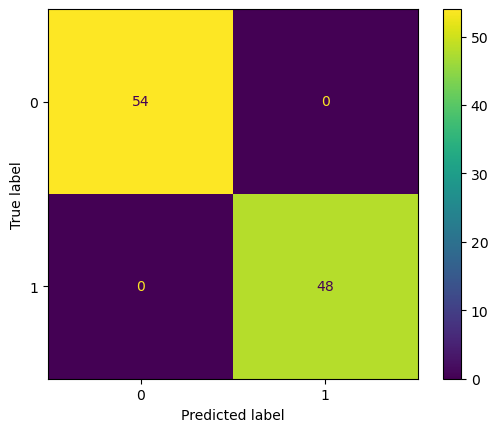

In [83]:
accuracy24=[]
precision=[]
recall=[]
f1score=[]
auc=[]

yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

par=best_params_list2[ac_list2.index(max(ac_list2))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gb_best = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    y_pred = fit_eval_model(gb_best, X_train, y_train, X_test, y_test)
    gb_best.fit(X_train, y_train)
    y_pred = gb_best.predict(X_test)
    
    accuracy24.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy24)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy24))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

In [84]:
best_params_list2[ac_list2.index(max(ac_list2))]

{'n_estimators': 50,
 'max_features': 1,
 'max_depth': 10,
 'learning_rate': 1,
 'criterion': 'friedman_mse'}

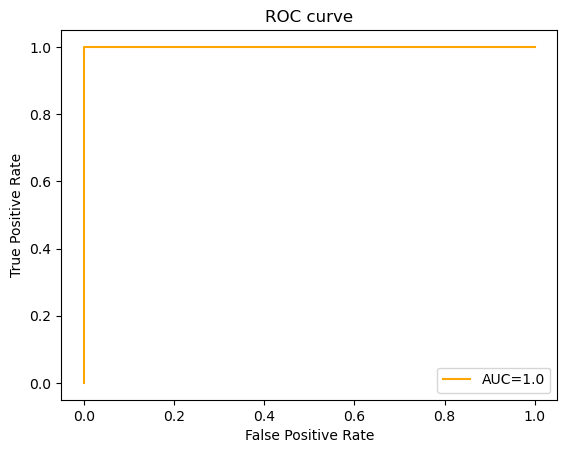

In [85]:
y_pred_proba = gb_best.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Saving best model

In [86]:
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(gb2, file)

print('model saved')

model saved
